In [1]:
# Sample API
import flowx
import simulation
import numpy
flowx.__version__

'0.1.dev'

In [2]:
# Define grid parameters
nx, ny = 80, 80

xmin, xmax = 0.0, 2.0*numpy.pi
ymin, ymax = 0.0, 2.0*numpy.pi

# Define cell-centered variable names
center_vars = ['pres', 'divv', 'asol', 'eror']
face_vars   = ['velc', 'hvar', 'asol', 'eror']

# Define boundary conditions for variable pressure and velocity [left, right, bottom, top]
bc_type_pres = {'pres': ['neumann', 'neumann', 'neumann', 'neumann']}
bc_val_pres  = {'pres': [0.0, 0.0, 0.0, 0.0]}

bc_type_u = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_u  = {'velc': [0.0, 0.0, 0.0, 0.0]}

bc_type_v = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_v  = {'velc': [0.0, 0.0, 0.0, 0.0]}

# Create the grid and data
gridc = flowx.Grid('cell-centered', center_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_pres, user_bc_val=bc_val_pres)

gridx = flowx.Grid('x-face', face_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_u, user_bc_val=bc_val_u)

gridy = flowx.Grid('y-face', face_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_v, user_bc_val=bc_val_v)

scalars = flowx.Scalars(tmax=2, dt=0.0001, Re=1.0)

simulation.update_bc_val(gridx, gridy, 'velc', scalars.variable['to'])

In [3]:
simulation.get_initial(gridc, gridx, gridy, 'velc', 'pres')

<IPython.core.display.Javascript object>


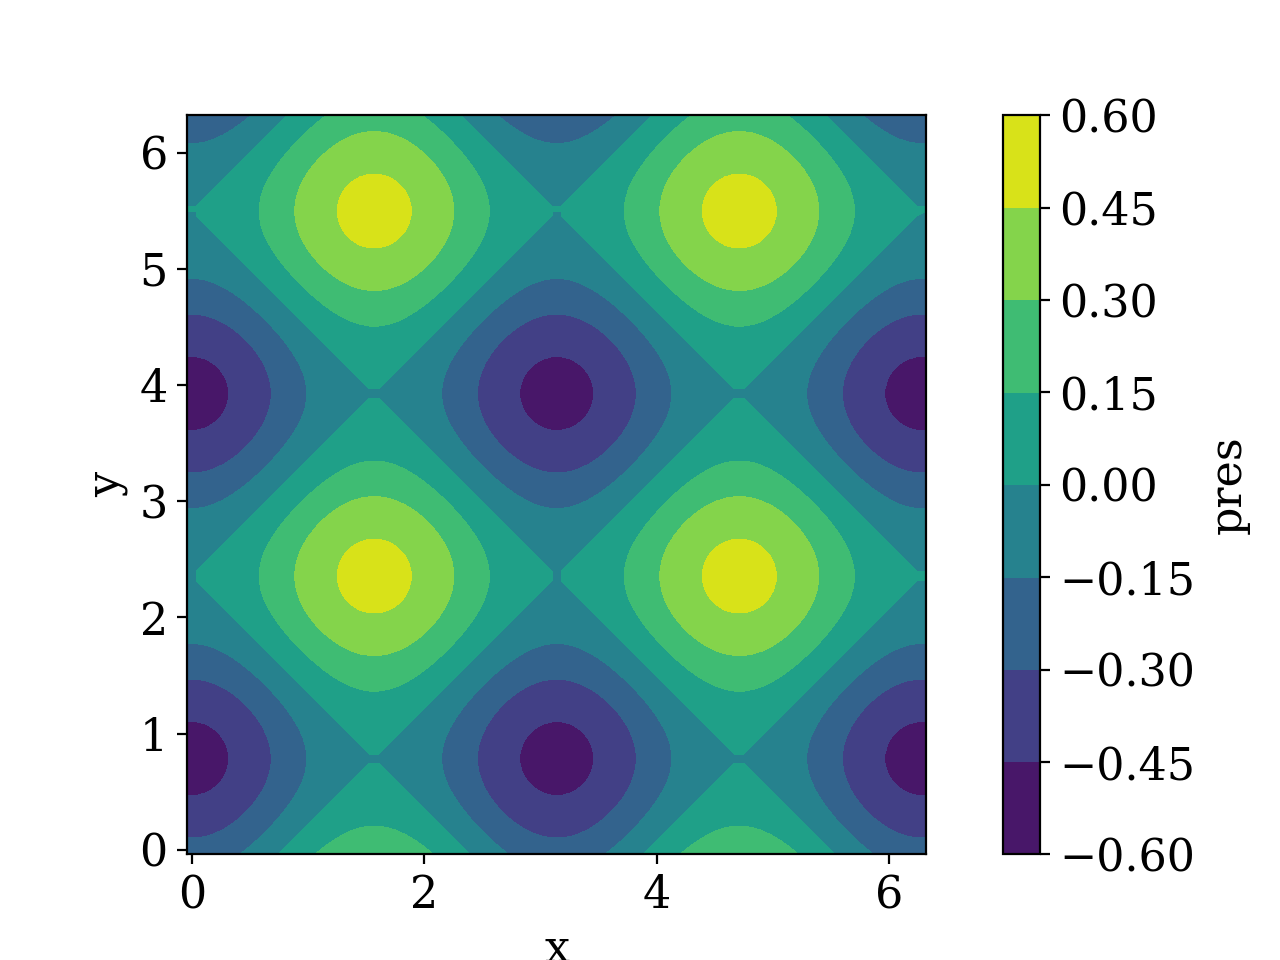

<IPython.core.display.Javascript object>


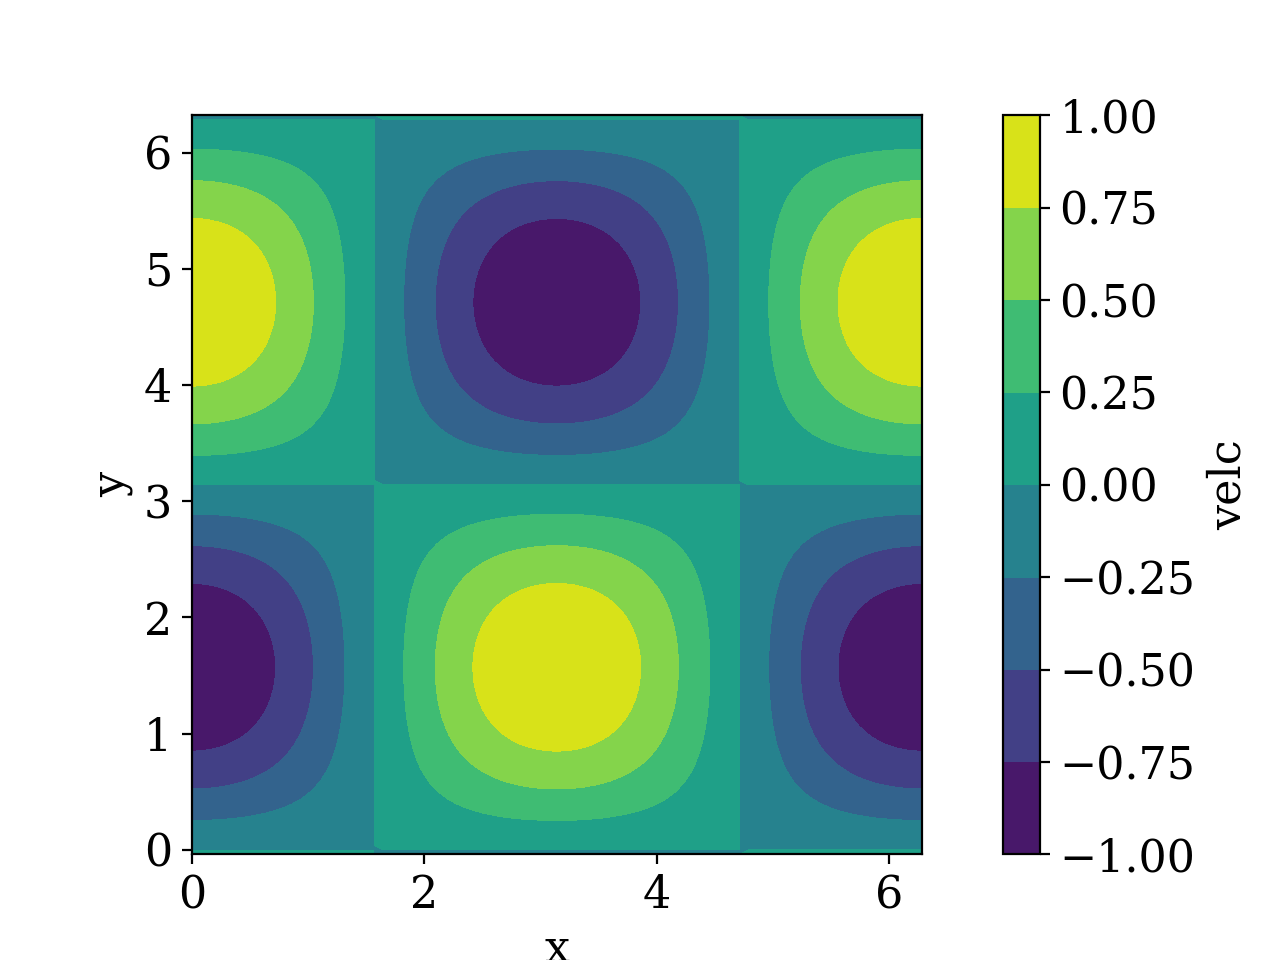

<IPython.core.display.Javascript object>


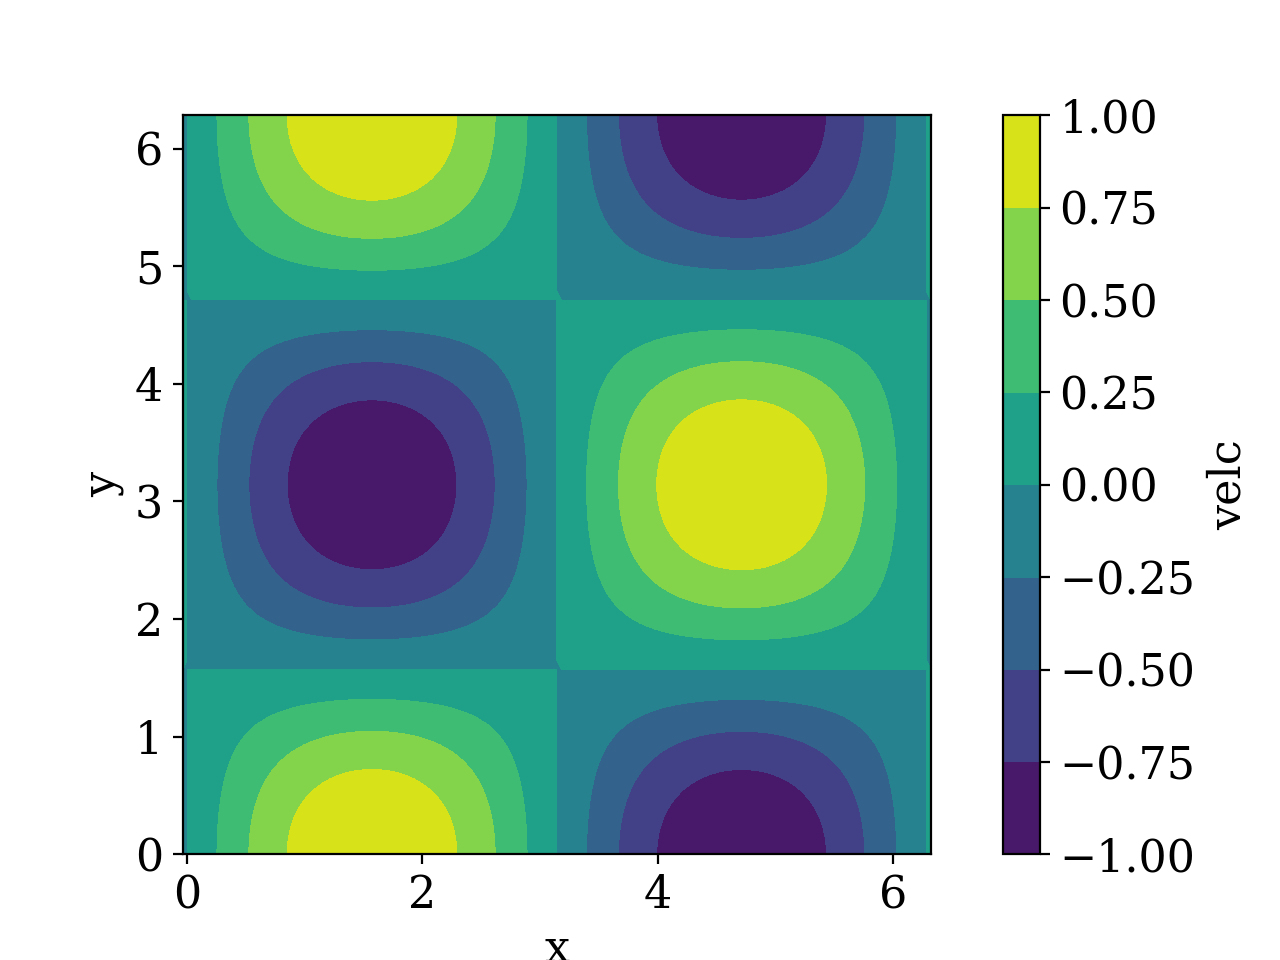

<IPython.core.display.Javascript object>


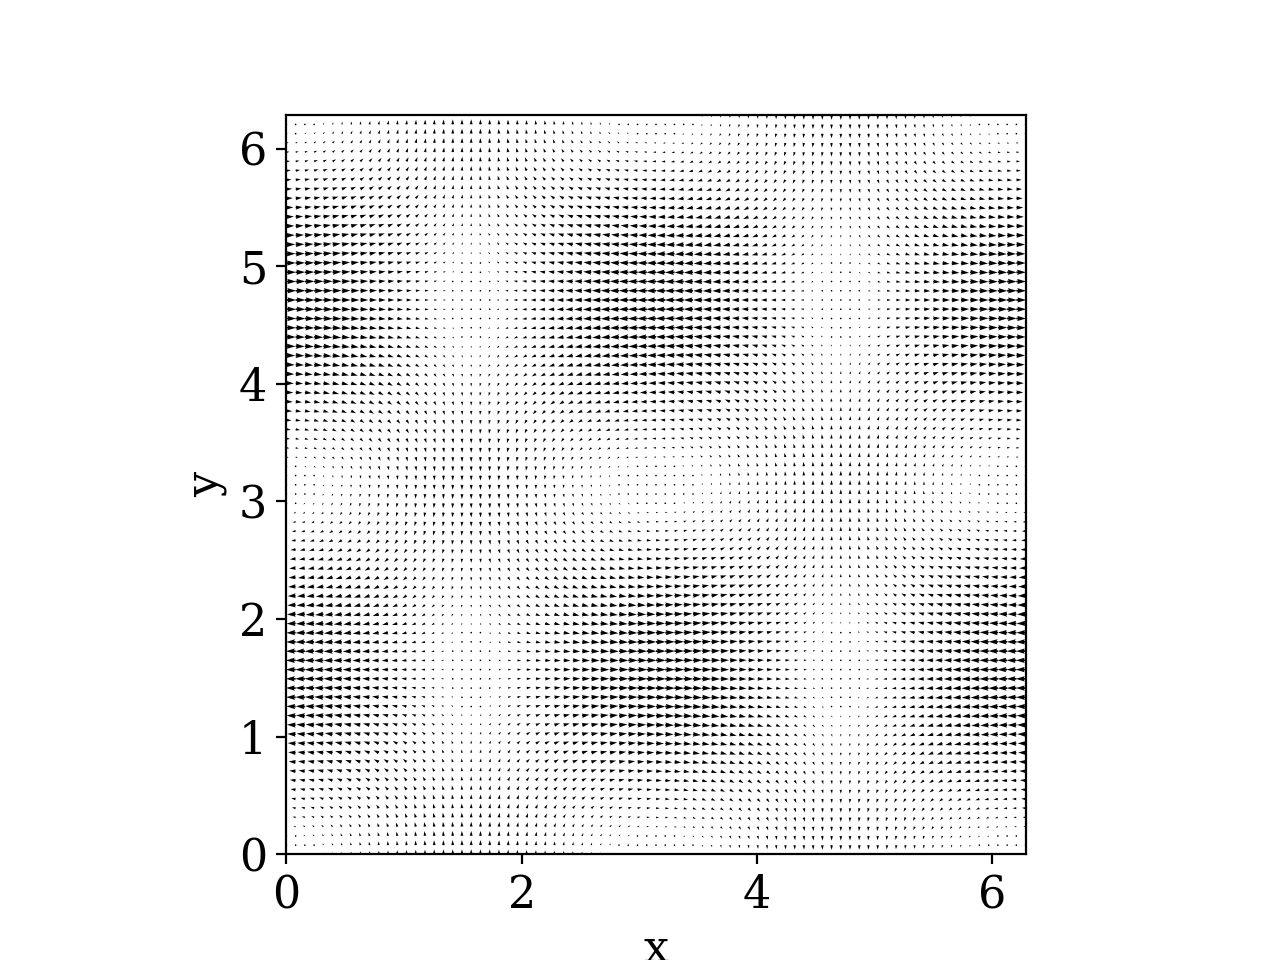

In [4]:
%matplotlib notebook
flowx.io.plot_contour(gridc, 'pres')
flowx.io.plot_contour(gridx, 'velc')
flowx.io.plot_contour(gridy, 'velc')
flowx.io.plot_vector(gridx, gridy, 'velc')

In [5]:
ins_vars = ['velc', 'hvar', 'divv', 'pres']

poisson_options = dict(maxiter = 2000, tol = 1e-9)
poisson_options['lu'], poisson_options['mtx'] = flowx.poisson.build_sparse(gridc, 'pres')

while scalars.variable['time'] <= scalars.variable['tmax']:
    
    for i in range(0,3):
        
        # Update the time-dependent boundary condition value
        simulation.update_bc_val(gridx, gridy, 'velc', scalars.variable['time'])

        # Predictor Step
        flowx.ins.rk3(gridc, gridx, gridy, scalars, ins_vars, 'predictor', i=i)

        # Divergence Step
        flowx.ins.rk3(gridc, gridx, gridy, scalars, ins_vars, 'divergence', i=i)

        # Solve the pressure Poisson equation 
        scalars.stats['ites'], scalars.stats['res'] = flowx.poisson.solve_lu(gridc, 'pres', 'divv', 
                                                                                        poisson_options)
        # Corrector Step
        flowx.ins.rk3(gridc, gridx, gridy, scalars, ins_vars, 'corrector', i=i)

    # Display stats
    if scalars.variable['nstep'] % 10 == 0:
        flowx.io.display_stats(scalars)   

    scalars.advance()

------------ Time = 0.0 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0232778975814725e-11
Max, Min, U   : 0.9992290362407229, -0.9992290362407229
Max, Min, V   : 0.9992290362407229, -0.9992290362407229
Max, Min, P   : 2.528957459119733, -0.5822969866788972
Max, Min, DIV : 4.3298697960381105e-15, -4.3298697960381105e-15


------------ Time = 0.0010000000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.28056597321003e-12
Max, Min, U   : 0.9972325752946745, -0.9972325752946745
Max, Min, V   : 0.9972325752946745, -0.9972325752946745
Max, Min, P   : 2.1227603905364294, -0.981045288460574
Max, Min, DIV : 5.329070518200751e-15, -5.329070518200751e-15


------------ Time = 0.0020000000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.356326571170315e-12
Max, Min, U   : 0.9952401032802568, -0.9952401032802568
Max, Min, V   : 0.9952401032802568, -0.9952401032802568
Max, Min, 

------------ Time = 0.02399999999999991 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.140725864700806e-11
Max, Min, U   : 0.9523989554699257, -0.9523989554699257
Max, Min, V   : 0.9523989554699257, -0.9523989554699257
Max, Min, P   : 2.632019024517588, -0.32794901259785525
Max, Min, DIV : 5.329070518200751e-15, -4.3298697960381105e-15


------------ Time = 0.024999999999999904 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.2022813316331577e-11
Max, Min, U   : 0.9504960610876662, -0.9504960610876662
Max, Min, V   : 0.9504960610876662, -0.9504960610876662
Max, Min, P   : -0.9503374124746069, -3.9043090359267567
Max, Min, DIV : 4.3298697960381105e-15, -4.3298697960381105e-15


------------ Time = 0.025999999999999898 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.4881403456384786e-11
Max, Min, U   : 0.9485969686909183, -0.9485969686909183
Max, Min, V   : 0.9485969686909183, -0.9485969

------------ Time = 0.04600000000000029 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.4420651551374092e-11
Max, Min, U   : 0.9114019495301406, -0.9114019495301406
Max, Min, V   : 0.9114019495301406, -0.9114019495301406
Max, Min, P   : 2.9553499680226984, 0.1237801280741756
Max, Min, DIV : 4.3298697960381105e-15, -4.3298697960381105e-15


------------ Time = 0.04700000000000032 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.740400290098732e-12
Max, Min, U   : 0.9095809672203841, -0.9095809672203841
Max, Min, V   : 0.9095809672203841, -0.9095809672203841
Max, Min, P   : 1.6132434476419906, -1.2126419546424652
Max, Min, DIV : 4.3298697960381105e-15, -4.3298697960381105e-15


------------ Time = 0.04800000000000035 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.098616146235534e-11
Max, Min, U   : 0.9077636232357092, -0.9077636232357092
Max, Min, V   : 0.9077636232357092, -0.90776362323

------------ Time = 0.06900000000000095 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.25926183780606e-12
Max, Min, U   : 0.870427106223707, -0.870427106223707
Max, Min, V   : 0.870427106223707, -0.870427106223707
Max, Min, P   : 2.267497262757157, -0.43622283667467826
Max, Min, DIV : 4.3298697960381105e-15, -4.3298697960381105e-15


------------ Time = 0.07000000000000098 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.83192886438712e-12
Max, Min, U   : 0.8686879917054825, -0.8686879917054825
Max, Min, V   : 0.8686879917054825, -0.8686879917054825
Max, Min, P   : 0.44560209165582443, -2.2526938932292855
Max, Min, DIV : 4.3298697960381105e-15, -4.3298697960381105e-15


------------ Time = 0.071000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.246858126546741e-12
Max, Min, U   : 0.8669523519403831, -0.8669523519403831
Max, Min, V   : 0.8669523519403831, -0.8669523519403831
M

------------ Time = 0.09200000000000161 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.2193181211776436e-12
Max, Min, U   : 0.8312944114718737, -0.8312944114718737
Max, Min, V   : 0.8312944114718737, -0.8312944114718737
Max, Min, P   : 1.466258871201653, -1.1154451441354325
Max, Min, DIV : 4.3298697960381105e-15, -5.329070518200751e-15


------------ Time = 0.09300000000000164 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6796197479701558e-11
Max, Min, U   : 0.8296334841299142, -0.8296334841299142
Max, Min, V   : 0.8296334841299142, -0.8296334841299142
Max, Min, P   : 3.0980019782427872, 0.5214752772863344
Max, Min, DIV : 4.3298697960381105e-15, -4.3298697960381105e-15


------------ Time = 0.09400000000000167 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.234677013423483e-11
Max, Min, U   : 0.8279758753229974, -0.8279758753229974
Max, Min, V   : 0.8279758753229974, -0.827975875322

------------ Time = 0.11500000000000227 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.3393824553713555e-12
Max, Min, U   : 0.7939210458902725, -0.7939210458902725
Max, Min, V   : 0.7939210458902725, -0.7939210458902725
Max, Min, P   : 1.649361910422452, -0.8158701826774982
Max, Min, DIV : 4.6629367034256575e-15, -5.162537064506978e-15


------------ Time = 0.1160000000000023 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0467083782182504e-11
Max, Min, U   : 0.7923347905825513, -0.7923347905825513
Max, Min, V   : 0.7923347905825513, -0.7923347905825513
Max, Min, P   : 0.10124360467828396, -2.359046139338137
Max, Min, DIV : 4.3298697960381105e-15, -4.3298697960381105e-15


------------ Time = 0.11700000000000232 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.673592062705874e-12
Max, Min, U   : 0.790751704615049, -0.790751704615049
Max, Min, V   : 0.790751704615049, -0.790751704615049

------------ Time = 0.13700000000000123 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.665909345986892e-12
Max, Min, U   : 0.7597458867858381, -0.7597458867858381
Max, Min, V   : 0.7597458867858381, -0.7597458867858381
Max, Min, P   : 0.6689887832383973, -1.6897814232934187
Max, Min, DIV : 4.3298697960381105e-15, -4.3298697960381105e-15


------------ Time = 0.13800000000000112 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.43811808561008e-12
Max, Min, U   : 0.7582279134915519, -0.7582279134915519
Max, Min, V   : 0.7582279134915519, -0.7582279134915519
Max, Min, P   : 0.40382167776477373, -1.9502206533780304
Max, Min, DIV : 4.3298697960381105e-15, -4.3298697960381105e-15


------------ Time = 0.139000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.319130177657277e-12
Max, Min, U   : 0.7567129731099307, -0.7567129731099307
Max, Min, V   : 0.7567129731099307, -0.7567129731099

------------ Time = 0.1609999999999986 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0503230689306684e-11
Max, Min, U   : 0.7241394742887468, -0.7241394742887468
Max, Min, V   : 0.7241394742887468, -0.7241394742887468
Max, Min, P   : 2.2353000882949354, -0.012589487980898217
Max, Min, DIV : 4.3298697960381105e-15, -4.3298697960381105e-15


------------ Time = 0.16199999999999848 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.224599742944853e-12
Max, Min, U   : 0.7226926426540814, -0.7226926426540814
Max, Min, V   : 0.7226926426540814, -0.7226926426540814
Max, Min, P   : 1.9352216650975167, -0.30816320812353276
Max, Min, DIV : 4.3298697960381105e-15, -4.246603069191224e-15


------------ Time = 0.16299999999999837 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1019607656310995e-11
Max, Min, U   : 0.7212487017909501, -0.7212487017909501
Max, Min, V   : 0.7212487017909501, -0.72124870

------------ Time = 0.18399999999999606 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.4139764928615565e-12
Max, Min, U   : 0.6915835844244809, -0.6915835844244809
Max, Min, V   : 0.6915835844244809, -0.6915835844244809
Max, Min, P   : 0.9122670552228677, -1.2342749521976395
Max, Min, DIV : 4.3298697960381105e-15, -4.3298697960381105e-15


------------ Time = 0.18499999999999595 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.456495239822294e-12
Max, Min, U   : 0.6902017995011503, -0.6902017995011503
Max, Min, V   : 0.6902017995011503, -0.6902017995011503
Max, Min, P   : 0.9028390845416872, -1.2394020670337664
Max, Min, DIV : 4.3298697960381105e-15, -4.3298697960381105e-15


------------ Time = 0.18599999999999584 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.2200747130175744e-12
Max, Min, U   : 0.6888227753859381, -0.6888227753859381
Max, Min, V   : 0.6888227753859381, -0.688822775

------------ Time = 0.20699999999999352 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.152974585644616e-12
Max, Min, U   : 0.6604913434876474, -0.6604913434876474
Max, Min, V   : 0.6604913434876474, -0.6604913434876474
Max, Min, P   : 1.7435877501153743, -0.3061917374935563
Max, Min, DIV : 4.163336342344337e-15, -4.3298697960381105e-15


------------ Time = 0.2079999999999934 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.1305280192068913e-11
Max, Min, U   : 0.6591717065728615, -0.6591717065728617
Max, Min, V   : 0.6591717065728615, -0.6591717065728615
Max, Min, P   : -1.3280961418753723, -3.3737692979784786
Max, Min, DIV : 4.163336342344337e-15, -4.246603069191224e-15


------------ Time = 0.2089999999999933 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.739605867576936e-12
Max, Min, U   : 0.6578552234282775, -0.6578552234282776
Max, Min, V   : 0.6578552234282775, -0.65785522342827

------------ Time = 0.2289999999999911 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3954667096683801e-11
Max, Min, U   : 0.6320707361683777, -0.6320707361683777
Max, Min, V   : 0.6320707361683776, -0.6320707361683777
Max, Min, P   : -0.5813037295311287, -2.542624870293073
Max, Min, DIV : 4.246603069191224e-15, -4.163336342344337e-15


------------ Time = 0.229999999999991 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3003523249145022e-11
Max, Min, U   : 0.6308083740977607, -0.6308083740977609
Max, Min, V   : 0.6308083740977608, -0.6308083740977609
Max, Min, P   : 2.4024663718697505, 0.44507380720816603
Max, Min, DIV : 4.163336342344337e-15, -4.496403249731884e-15


------------ Time = 0.23099999999999088 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.845340317930512e-12
Max, Min, U   : 0.6295485330113666, -0.6295485330113667
Max, Min, V   : 0.6295485330113666, -0.6295485330113668

------------ Time = 0.25299999999998846 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.0180318834617636e-11
Max, Min, U   : 0.6024597589694118, -0.6024597589694117
Max, Min, V   : 0.6024597589694117, -0.602459758969412
Max, Min, P   : 3.139049225608074, 1.269867479771522
Max, Min, DIV : 4.08006961549745e-15, -4.246603069191224e-15


------------ Time = 0.25399999999998835 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.323969020544136e-12
Max, Min, U   : 0.6012565317651466, -0.6012565317651467
Max, Min, V   : 0.6012565317651466, -0.6012565317651467
Max, Min, P   : 1.926091486738742, 0.06065323298542543
Max, Min, DIV : 4.3298697960381105e-15, -4.246603069191224e-15


------------ Time = 0.25499999999998824 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.08164229818329e-12
Max, Min, U   : 0.6000557075046652, -0.6000557075046651
Max, Min, V   : 0.6000557075046649, -0.6000557075046652
Max

------------ Time = 0.2769999999999858 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.382334716069108e-12
Max, Min, U   : 0.5742359108502021, -0.5742359108502021
Max, Min, V   : 0.574235910850202, -0.5742359108502018
Max, Min, P   : 1.6551235123111139, -0.126259033862423
Max, Min, DIV : 3.913536161803677e-15, -3.9968028886505635e-15


------------ Time = 0.2779999999999857 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.732053116594258e-12
Max, Min, U   : 0.5730890495633464, -0.5730890495633465
Max, Min, V   : 0.5730890495633464, -0.5730890495633462
Max, Min, P   : 0.9676781979727922, -0.8101371619791794
Max, Min, DIV : 4.246603069191224e-15, -3.9968028886505635e-15


------------ Time = 0.2789999999999856 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1328174002701164e-11
Max, Min, U   : 0.5719444787007947, -0.5719444787007948
Max, Min, V   : 0.5719444787007946, -0.5719444787007945


------------ Time = 0.2999999999999833 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.650065667115641e-12
Max, Min, U   : 0.5484295610454502, -0.54842956104545
Max, Min, V   : 0.5484295610454498, -0.54842956104545
Max, Min, P   : 1.7744067170766653, 0.07328284605513977
Max, Min, DIV : 3.9968028886505635e-15, -4.0592529337857286e-15


------------ Time = 0.30099999999998317 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.063656504781166e-12
Max, Min, U   : 0.5473342386920801, -0.5473342386920801
Max, Min, V   : 0.5473342386920798, -0.54733423869208
Max, Min, P   : 0.0910147576159702, -1.6067030433583274
Max, Min, DIV : 4.08006961549745e-15, -4.08006961549745e-15


------------ Time = 0.30199999999998306 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.106907284855358e-11
Max, Min, U   : 0.5462411038728993, -0.546241103872899
Max, Min, V   : 0.5462411038728989, -0.5462411038728991
Max, M

------------ Time = 0.32399999999998064 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.678422988878179e-12
Max, Min, U   : 0.5227368364907315, -0.5227368364907318
Max, Min, V   : 0.5227368364907317, -0.5227368364907318
Max, Min, P   : 1.8471951409111684, 0.2259576883455116
Max, Min, DIV : 4.111294638065033e-15, -4.163336342344337e-15


------------ Time = 0.3249999999999805 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.15924662901878e-12
Max, Min, U   : 0.521692827039363, -0.5216928270393635
Max, Min, V   : 0.5216928270393631, -0.5216928270393631
Max, Min, P   : -0.2038497369260288, -1.8218414451780172
Max, Min, DIV : 3.3306690738754696e-15, -3.4555691641457997e-15


------------ Time = 0.3259999999999804 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.518746732216277e-12
Max, Min, U   : 0.5206509026768138, -0.5206509026768139
Max, Min, V   : 0.5206509026768137, -0.5206509026768138


------------ Time = 0.347999999999978 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6653525617004845e-11
Max, Min, U   : 0.4982477558016058, -0.4982477558016057
Max, Min, V   : 0.4982477558016057, -0.49824775580160574
Max, Min, P   : 2.6009484954430793, 1.0558376061166894
Max, Min, DIV : 2.6645352591003757e-15, -2.248201624865942e-15


------------ Time = 0.3489999999999779 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.9057248814006313e-12
Max, Min, U   : 0.4972526561255281, -0.49725265612552794
Max, Min, V   : 0.497252656125528, -0.497252656125528
Max, Min, P   : 0.5425099276993577, -0.9995079588618089
Max, Min, DIV : 2.3314683517128287e-15, -2.6645352591003757e-15


------------ Time = 0.3499999999999778 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.5292757934148308e-12
Max, Min, U   : 0.4962595438846694, -0.4962595438846692
Max, Min, V   : 0.49625954388466925, -0.4962595438846

------------ Time = 0.37299999999997524 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.399049743993841e-12
Max, Min, U   : 0.47395746677409434, -0.4739574667740943
Max, Min, V   : 0.4739574667740943, -0.4739574667740943
Max, Min, P   : 1.0302729397635495, -0.4393459547854325
Max, Min, DIV : 2.1649348980190553e-15, -2.1649348980190553e-15


------------ Time = 0.37399999999997513 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.241329101985946e-12
Max, Min, U   : 0.4730108805085872, -0.4730108805085872
Max, Min, V   : 0.4730108805085872, -0.4730108805085872
Max, Min, P   : 0.44594186125415625, -1.0207354630507504
Max, Min, DIV : 2.1649348980190553e-15, -2.6645352591003757e-15


------------ Time = 0.374999999999975 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5956952617494364e-11
Max, Min, U   : 0.4720661848104805, -0.4720661848104805
Max, Min, V   : 0.4720661848104805, -0.4720661848

------------ Time = 0.3949999999999728 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.524100222486654e-12
Max, Min, U   : 0.4535635311201132, -0.4535635311201134
Max, Min, V   : 0.45356353112011344, -0.4535635311201133
Max, Min, P   : 0.5275087905594148, -0.8788051490681783
Max, Min, DIV : 2.1649348980190553e-15, -2.1649348980190553e-15


------------ Time = 0.3959999999999727 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.250692139441341e-12
Max, Min, U   : 0.452657676789069, -0.45265767678906915
Max, Min, V   : 0.4526576767890692, -0.45265767678906904
Max, Min, P   : 0.8154148278702656, -0.5880894701585329
Max, Min, DIV : 2.1649348980190553e-15, -2.1649348980190553e-15


------------ Time = 0.3969999999999726 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.0886941095704526e-12
Max, Min, U   : 0.4517536316909915, -0.45175363169099164
Max, Min, V   : 0.45175363169099164, -0.451753631

------------ Time = 0.4189999999999702 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.564004101085502e-12
Max, Min, U   : 0.43231513915096653, -0.43231513915096653
Max, Min, V   : 0.43231513915096653, -0.43231513915096653
Max, Min, P   : 1.368056824169005, 0.027647187756586755
Max, Min, DIV : 2.3314683517128287e-15, -2.1649348980190553e-15


------------ Time = 0.41999999999997006 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.1111010981392503e-12
Max, Min, U   : 0.43145172371560386, -0.4314517237156038
Max, Min, V   : 0.4314517237156038, -0.43145172371560375
Max, Min, P   : 0.7678383801030874, -0.5698933073853977
Max, Min, DIV : 2.6645352591003757e-15, -2.1649348980190553e-15


------------ Time = 0.42099999999996995 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.222868712198177e-12
Max, Min, U   : 0.43059003276660573, -0.4305900327666058
Max, Min, V   : 0.43059003276660585, -0.430

------------ Time = 0.44299999999996753 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.7101361027349355e-12
Max, Min, U   : 0.41206222929273534, -0.41206222929273534
Max, Min, V   : 0.41206222929273534, -0.4120622292927353
Max, Min, P   : 0.39940074332174424, -0.8781935961664704
Max, Min, DIV : 2.1649348980190553e-15, -2.1649348980190553e-15


------------ Time = 0.4439999999999674 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.202926667325925e-12
Max, Min, U   : 0.4112392648276243, -0.41123926482762435
Max, Min, V   : 0.41123926482762446, -0.4112392648276243
Max, Min, P   : 0.3299556863742263, -0.9450862208530925
Max, Min, DIV : 2.1649348980190553e-15, -2.1649348980190553e-15


------------ Time = 0.4449999999999673 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.44955368068877e-12
Max, Min, U   : 0.41041794406876503, -0.41041794406876503
Max, Min, V   : 0.41041794406876514, -0.4104

------------ Time = 0.4669999999999649 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.836737819173192e-12
Max, Min, U   : 0.3927581702816181, -0.39275817028161814
Max, Min, V   : 0.3927581702816181, -0.39275817028161797
Max, Min, P   : 0.21119302257032138, -1.0065301684466121
Max, Min, DIV : 2.6645352591003757e-15, -2.1649348980190553e-15


------------ Time = 0.4679999999999648 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.565158376302377e-12
Max, Min, U   : 0.39197376191070676, -0.39197376191070676
Max, Min, V   : 0.3919737619107067, -0.39197376191070665
Max, Min, P   : 0.8110463228595888, -0.4042440668259385
Max, Min, DIV : 2.1649348980190553e-15, -2.6645352591003757e-15


------------ Time = 0.46899999999996467 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.6903084883439995e-12
Max, Min, U   : 0.39119092024730423, -0.39119092024730423
Max, Min, V   : 0.3911909202473043, -0.3911

------------ Time = 0.49099999999996224 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.2961615266508908e-12
Max, Min, U   : 0.3743585136768195, -0.3743585136768194
Max, Min, V   : 0.3743585136768195, -0.3743585136768195
Max, Min, P   : 0.7499548931294975, -0.4107032467417565
Max, Min, DIV : 2.1649348980190553e-15, -2.1649348980190553e-15


------------ Time = 0.49199999999996213 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.806972303811492e-12
Max, Min, U   : 0.3736108552298203, -0.3736108552298202
Max, Min, V   : 0.3736108552298203, -0.3736108552298203
Max, Min, P   : 1.200671175835177, 0.04233181560730806
Max, Min, DIV : 2.1649348980190553e-15, -2.1649348980190553e-15


------------ Time = 0.492999999999962 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.1985912015234694e-12
Max, Min, U   : 0.37286469009639844, -0.3728646900963983
Max, Min, V   : 0.37286469009639844, -0.3728646900

------------ Time = 0.5149999999999596 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.902206808169819e-12
Max, Min, U   : 0.35682089194304584, -0.35682089194304584
Max, Min, V   : 0.35682089194304584, -0.3568208919430459
Max, Min, P   : 1.196154249551532, 0.08988663074912631
Max, Min, DIV : 2.1649348980190553e-15, -2.1649348980190553e-15


------------ Time = 0.5159999999999595 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.8259566060940723e-12
Max, Min, U   : 0.35610826181274685, -0.35610826181274685
Max, Min, V   : 0.3561082618127468, -0.3561082618127468
Max, Min, P   : 0.4482706188872654, -0.6557868961150828
Max, Min, DIV : 2.1649348980190553e-15, -2.1649348980190553e-15


------------ Time = 0.5169999999999594 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7019744541925349e-12
Max, Min, U   : 0.35539705503851754, -0.35539705503851754
Max, Min, V   : 0.35539705503851754, -0.35539

------------ Time = 0.538999999999957 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.216743019842181e-12
Max, Min, U   : 0.3401049212498979, -0.3401049212498977
Max, Min, V   : 0.3401049212498978, -0.3401049212498978
Max, Min, P   : 0.1960951608272218, -0.8583310768248867
Max, Min, DIV : 2.123301534595612e-15, -2.1649348980190553e-15


------------ Time = 0.5399999999999568 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.540344724120142e-12
Max, Min, U   : 0.3394256784413214, -0.33942567844132127
Max, Min, V   : 0.3394256784413213, -0.3394256784413213
Max, Min, P   : 0.8875959744494688, -0.16472374034722567
Max, Min, DIV : 2.123301534595612e-15, -2.123301534595612e-15


------------ Time = 0.5409999999999567 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6602156868999581e-12
Max, Min, U   : 0.3387477923071467, -0.33874779230714663
Max, Min, V   : 0.3387477923071467, -0.33874779230714

------------ Time = 0.5629999999999543 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.807278279465253e-12
Max, Min, U   : 0.3241721087752915, -0.3241721087752915
Max, Min, V   : 0.32417210877529146, -0.32417210877529146
Max, Min, P   : -0.01591516038858166, -1.0209296520015263
Max, Min, DIV : 2.123301534595612e-15, -2.123301534595612e-15


------------ Time = 0.5639999999999542 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.8373435728003435e-12
Max, Min, U   : 0.3235246891380461, -0.3235246891380461
Max, Min, V   : 0.3235246891380461, -0.3235246891380461
Max, Min, P   : -0.023819645140330768, -1.0268263390479673
Max, Min, DIV : 2.0816681711721685e-15, -2.1649348980190553e-15


------------ Time = 0.5649999999999541 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.2345002859473545e-12
Max, Min, U   : 0.3228785626162412, -0.32287856261624126
Max, Min, V   : 0.32287856261624126, -0.32287

------------ Time = 0.5869999999999517 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.5315542240688197e-12
Max, Min, U   : 0.30898576430959274, -0.3089857643095927
Max, Min, V   : 0.3089857643095926, -0.3089857643095928
Max, Min, P   : 0.7133996220625711, -0.2445188616014955
Max, Min, DIV : 2.123301534595612e-15, -2.0816681711721685e-15


------------ Time = 0.5879999999999516 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.842912426081659e-12
Max, Min, U   : 0.3083686769451396, -0.3083686769451396
Max, Min, V   : 0.3083686769451396, -0.3083686769451396
Max, Min, P   : 1.4457192071664065, 0.4897144240171966
Max, Min, DIV : 2.0556473190325164e-15, -2.0816681711721685e-15


------------ Time = 0.5889999999999515 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.032202962775022e-12
Max, Min, U   : 0.3077528221138522, -0.30775282211385224
Max, Min, V   : 0.30775282211385224, -0.307752822113

------------ Time = 0.610999999999949 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.832360888291755e-12
Max, Min, U   : 0.29451091596585127, -0.2945109159658513
Max, Min, V   : 0.2945109159658513, -0.2945109159658514
Max, Min, P   : -0.19473795805471825, -1.1077676184489158
Max, Min, DIV : 1.9567680809018384e-15, -1.9984014443252818e-15


------------ Time = 0.6119999999999489 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.068304842623356e-12
Max, Min, U   : 0.29392273980175754, -0.2939227398017576
Max, Min, V   : 0.29392273980175754, -0.29392273980175765
Max, Min, P   : 0.1353488954078485, -0.7758567508087609
Max, Min, DIV : 1.9984014443252818e-15, -2.040034807748725e-15


------------ Time = 0.6129999999999488 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.606976385660821e-12
Max, Min, U   : 0.293335738426013, -0.29333573842601307
Max, Min, V   : 0.293335738426013, -0.29333573842

------------ Time = 0.6349999999999464 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.164679541232524e-12
Max, Min, U   : 0.280714229809724, -0.28071422980972405
Max, Min, V   : 0.280714229809724, -0.28071422980972405
Max, Min, P   : 0.9880646709041118, 0.11782011041260582
Max, Min, DIV : 2.123301534595612e-15, -1.8735013540549517e-15


------------ Time = 0.6359999999999463 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.857515736006635e-12
Max, Min, U   : 0.2801536103333077, -0.28015361033330777
Max, Min, V   : 0.28015361033330777, -0.28015361033330777
Max, Min, P   : 0.5887327228241962, -0.27977330586640975
Max, Min, DIV : 2.1024848528838902e-15, -2.0816681711721685e-15


------------ Time = 0.6369999999999462 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.9107514589594074e-12
Max, Min, U   : 0.279594110605134, -0.27959411060513395
Max, Min, V   : 0.279594110605134, -0.27959411060

------------ Time = 0.6589999999999437 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.8305380393844936e-12
Max, Min, U   : 0.26756393323049704, -0.26756393323049704
Max, Min, V   : 0.267563933230497, -0.267563933230497
Max, Min, P   : 0.25129611102015864, -0.5781684642235483
Max, Min, DIV : 1.9984014443252818e-15, -2.040034807748725e-15


------------ Time = 0.6599999999999436 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.4681365867286723e-12
Max, Min, U   : 0.2670295793745877, -0.26702957937458777
Max, Min, V   : 0.2670295793745877, -0.2670295793745877
Max, Min, P   : 0.6508088872440335, -0.17699863177941794
Max, Min, DIV : 1.9984014443252818e-15, -2.0192181260370035e-15


------------ Time = 0.6609999999999435 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.882329603917515e-12
Max, Min, U   : 0.2664962928049615, -0.26649629280496157
Max, Min, V   : 0.26649629280496157, -0.26649629

------------ Time = 0.6829999999999411 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.7257584206251776e-12
Max, Min, U   : 0.25502974188217603, -0.25502974188217614
Max, Min, V   : 0.2550297418821761, -0.25502974188217614
Max, Min, P   : 0.6741966908485972, -0.11639902958360844
Max, Min, DIV : 1.9463597400459776e-15, -1.582067810090848e-15


------------ Time = 0.683999999999941 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.3865338470676356e-12
Max, Min, U   : 0.25452042305602546, -0.2545204230560256
Max, Min, V   : 0.2545204230560256, -0.2545204230560256
Max, Min, P   : 0.6297689927715772, -0.1592473281233651
Max, Min, DIV : 1.7329887525008303e-15, -1.6653345369377348e-15


------------ Time = 0.6849999999999409 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.5751688825263354e-12
Max, Min, U   : 0.2540121215116847, -0.25401212151168484
Max, Min, V   : 0.2540121215116848, -0.2540121

------------ Time = 0.7069999999999385 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.286697375470019e-12
Max, Min, U   : 0.2430827900309062, -0.24308279003090624
Max, Min, V   : 0.24308279003090627, -0.24308279003090622
Max, Min, P   : 0.6003312985136785, -0.15321712053648395
Max, Min, DIV : 1.0824674490095276e-15, -1.0824674490095276e-15


------------ Time = 0.7079999999999383 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.61773131120595e-12
Max, Min, U   : 0.24259733328958127, -0.24259733328958133
Max, Min, V   : 0.24259733328958136, -0.2425973332895813
Max, Min, P   : 0.2358105963318449, -0.5162324400394116
Max, Min, DIV : 1.0824674490095276e-15, -1.0824674490095276e-15


------------ Time = 0.7089999999999382 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0668844803570256e-12
Max, Min, U   : 0.2421128461680465, -0.24211284616804657
Max, Min, V   : 0.24211284616804657, -0.24211

------------ Time = 0.7319999999999357 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.8003319337180825e-12
Max, Min, U   : 0.23123285149793021, -0.23123285149793021
Max, Min, V   : 0.23123285149793027, -0.2312328514979302
Max, Min, P   : -0.407357021348484, -1.1241594806754225
Max, Min, DIV : 1.3322676295501878e-15, -1.0824674490095276e-15


------------ Time = 0.7329999999999356 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.062697554609211e-12
Max, Min, U   : 0.23077106303437264, -0.23077106303437267
Max, Min, V   : 0.2307710630343727, -0.23077106303437261
Max, Min, P   : 0.560765759920227, -0.15460473105554406
Max, Min, DIV : 1.3322676295501878e-15, -1.1032841307212493e-15


------------ Time = 0.7339999999999355 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.3072977379735572e-12
Max, Min, U   : 0.23031019691538626, -0.23031019691538634
Max, Min, V   : 0.23031019691538632, -0.230

------------ Time = 0.7559999999999331 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.6121308038144686e-12
Max, Min, U   : 0.2204008054373621, -0.22040080543736212
Max, Min, V   : 0.2204008054373621, -0.22040080543736207
Max, Min, P   : 0.7332911765031987, 0.05007779787001409
Max, Min, DIV : 1.0824674490095276e-15, -1.0824674490095276e-15


------------ Time = 0.756999999999933 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1915582377466804e-12
Max, Min, U   : 0.21996065213722754, -0.21996065213722754
Max, Min, V   : 0.21996065213722754, -0.2199606521372275
Max, Min, P   : 0.2543614216228979, -0.42748709548953745
Max, Min, DIV : 1.3322676295501878e-15, -1.0824674490095276e-15


------------ Time = 0.7579999999999328 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.5855061064318436e-12
Max, Min, U   : 0.2195213779671702, -0.21952137796717022
Max, Min, V   : 0.21952137796717025, -0.2195

------------ Time = 0.7799999999999304 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.3530137241287527e-12
Max, Min, U   : 0.2100762489714237, -0.2100762489714237
Max, Min, V   : 0.21007624897142368, -0.21007624897142366
Max, Min, P   : 0.5684384765805717, -0.08275991405298216
Max, Min, DIV : 1.0824674490095276e-15, -1.0824674490095276e-15


------------ Time = 0.7809999999999303 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.0600374640977336e-12
Max, Min, U   : 0.2096567171629965, -0.2096567171629965
Max, Min, V   : 0.20965671716299647, -0.20965671716299647
Max, Min, P   : 0.11650903413842081, -0.5333884566105234
Max, Min, DIV : 1.3114509478384662e-15, -1.3322676295501878e-15


------------ Time = 0.7819999999999302 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.4212207803608824e-12
Max, Min, U   : 0.20923802329469982, -0.20923802329469984
Max, Min, V   : 0.20923802329469982, -0.20

------------ Time = 0.8039999999999278 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.6591031465135877e-12
Max, Min, U   : 0.2002354046586735, -0.20023540465867362
Max, Min, V   : 0.2002354046586735, -0.2002354046586735
Max, Min, P   : 0.02752889226290004, -0.5931548281983281
Max, Min, DIV : 1.0824674490095276e-15, -1.3322676295501878e-15


------------ Time = 0.8049999999999277 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.3782998918218614e-12
Max, Min, U   : 0.19983552816002118, -0.19983552816002126
Max, Min, V   : 0.1998355281600212, -0.1998355281600212
Max, Min, P   : -0.06243212223629237, -0.6818759067025776
Max, Min, DIV : 1.0824674490095276e-15, -1.0824674490095276e-15


------------ Time = 0.8059999999999276 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.207411715848677e-12
Max, Min, U   : 0.19943645034129226, -0.19943645034129234
Max, Min, V   : 0.19943645034129226, -0.199

------------ Time = 0.8279999999999251 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.704734633084057e-12
Max, Min, U   : 0.1908556090240401, -0.1908556090240401
Max, Min, V   : 0.1908556090240401, -0.1908556090240401
Max, Min, P   : 0.12566117744128208, -0.46593787433116407
Max, Min, DIV : 1.0824674490095276e-15, -1.0824674490095276e-15


------------ Time = 0.828999999999925 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.023320751920838e-13
Max, Min, U   : 0.19047446691903014, -0.19047446691903008
Max, Min, V   : 0.1904744669190301, -0.19047446691903008
Max, Min, P   : 0.33258519043297674, -0.2578320320173478
Max, Min, DIV : 1.0824674490095276e-15, -1.0824674490095276e-15


------------ Time = 0.8299999999999249 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1033138889956182e-12
Max, Min, U   : 0.19009408607310133, -0.1900940860731013
Max, Min, V   : 0.19009408607310127, -0.190094

------------ Time = 0.8499999999999227 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.2169837020340703e-12
Max, Min, U   : 0.18264401393870716, -0.18264401393870722
Max, Min, V   : 0.1826440139387072, -0.1826440139387072
Max, Min, P   : 0.6297819495464363, 0.0636449238171697
Max, Min, DIV : 1.0824674490095276e-15, -1.186550857568136e-15


------------ Time = 0.8509999999999226 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.8492583612208413e-12
Max, Min, U   : 0.1822792729145147, -0.18227927291451473
Max, Min, V   : 0.18227927291451468, -0.1822792729145147
Max, Min, P   : -0.027491152978549482, -0.5924972183553024
Max, Min, DIV : 1.0824674490095276e-15, -1.0824674490095276e-15


------------ Time = 0.8519999999999225 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.3496662689254024e-12
Max, Min, U   : 0.1819152603891471, -0.18191526038914713
Max, Min, V   : 0.18191526038914707, -0.1819

------------ Time = 0.8739999999999201 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.287396672422828e-12
Max, Min, U   : 0.17408838047426353, -0.1740883804742636
Max, Min, V   : 0.17408838047426345, -0.17408838047426353
Max, Min, P   : 0.026653277353809183, -0.5129552712872152
Max, Min, DIV : 1.0408340855860843e-15, -1.0824674490095276e-15


------------ Time = 0.87499999999992 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.67113073384276e-12
Max, Min, U   : 0.17374072762540033, -0.17374072762540038
Max, Min, V   : 0.17374072762540022, -0.17374072762540033
Max, Min, P   : -0.13166012028449237, -0.6701907079168463
Max, Min, DIV : 1.0824674490095276e-15, -1.2073675392798577e-15


------------ Time = 0.8759999999999198 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5401149029499662e-12
Max, Min, U   : 0.1733937691426196, -0.17339376914261964
Max, Min, V   : 0.1733937691426195, -0.1733

------------ Time = 0.8979999999999174 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6508024298025769e-12
Max, Min, U   : 0.1659335791349004, -0.16593357913490042
Max, Min, V   : 0.1659335791349004, -0.16593357913490037
Max, Min, P   : 0.4239943134090049, -0.09032893978586382
Max, Min, DIV : 1.0408340855860843e-15, -1.0824674490095276e-15


------------ Time = 0.8989999999999173 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.259307226961226e-13
Max, Min, U   : 0.16560221381957654, -0.16560221381957652
Max, Min, V   : 0.16560221381957652, -0.16560221381957652
Max, Min, P   : 0.2576881710010777, -0.25560763665578384
Max, Min, DIV : 1.0408340855860843e-15, -1.0824674490095276e-15


------------ Time = 0.8999999999999172 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.357213760984588e-12
Max, Min, U   : 0.16527151033679785, -0.16527151033679785
Max, Min, V   : 0.16527151033679788, -0.16

------------ Time = 0.9209999999999149 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.9795351012127334e-12
Max, Min, U   : 0.15847730249892847, -0.15847730249892852
Max, Min, V   : 0.1584773024989285, -0.1584773024989285
Max, Min, P   : 0.683452683556923, 0.19224854916578946
Max, Min, DIV : 1.061650767297806e-15, -1.061650767297806e-15


------------ Time = 0.9219999999999148 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.36473140905445e-13
Max, Min, U   : 0.15816082950176846, -0.15816082950176852
Max, Min, V   : 0.15816082950176846, -0.15816082950176846
Max, Min, P   : 0.19269153063657674, -0.2975313458761652
Max, Min, DIV : 1.0460382560140147e-15, -1.061650767297806e-15


------------ Time = 0.9229999999999147 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.4949959743986248e-12
Max, Min, U   : 0.1578449885904716, -0.1578449885904717
Max, Min, V   : 0.15784498859047166, -0.157844988

------------ Time = 0.9439999999999124 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.742110414773128e-12
Max, Min, U   : 0.15135612745500568, -0.1513561274550057
Max, Min, V   : 0.1513561274550057, -0.1513561274550057
Max, Min, P   : -0.2875840975157871, -0.7567084053309552
Max, Min, DIV : 1.0200174038743626e-15, -1.061650767297806e-15


------------ Time = 0.9449999999999122 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.467487693874064e-13
Max, Min, U   : 0.15105387742677912, -0.15105387742677917
Max, Min, V   : 0.15105387742677917, -0.15105387742677917
Max, Min, P   : 0.22328683348578354, -0.2449003276381183
Max, Min, DIV : 1.061650767297806e-15, -1.061650767297806e-15


------------ Time = 0.9459999999999121 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.0786776163849973e-12
Max, Min, U   : 0.150752231074721, -0.15075223107472102
Max, Min, V   : 0.150752231074721, -0.1507522310

------------ Time = 0.9659999999999099 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.1850104532844614e-12
Max, Min, U   : 0.1448442365680653, -0.1448442365680652
Max, Min, V   : 0.14484423656806525, -0.14484423656806528
Max, Min, P   : -0.12868204303385194, -0.5776159031212293
Max, Min, DIV : 9.992007221626409e-16, -1.0408340855860843e-15


------------ Time = 0.9669999999999098 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.4785753348112e-13
Max, Min, U   : 0.14455499254676576, -0.14455499254676565
Max, Min, V   : 0.1445549925467657, -0.1445549925467657
Max, Min, P   : 0.20276671943547994, -0.2452703303975018
Max, Min, DIV : 1.061650767297806e-15, -1.0304257447302234e-15


------------ Time = 0.9679999999999097 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5943575265608913e-12
Max, Min, U   : 0.1442663262227673, -0.14426632622276725
Max, Min, V   : 0.14426632622276725, -0.1442663

------------ Time = 0.9889999999999074 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.91111733372443e-12
Max, Min, U   : 0.1383357581555168, -0.1383357581555168
Max, Min, V   : 0.13833575815551682, -0.13833575815551682
Max, Min, P   : 0.7459132430880561, 0.31715900987882345
Max, Min, DIV : 1.0408340855860843e-15, -1.0278236595162582e-15


------------ Time = 0.9899999999999073 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.100107260647498e-13
Max, Min, U   : 0.13805951327142968, -0.13805951327142962
Max, Min, V   : 0.13805951327142965, -0.13805951327142968
Max, Min, P   : 0.27215349186433374, -0.1557442457740458
Max, Min, DIV : 9.575673587391975e-16, -1.0200174038743626e-15


------------ Time = 0.9909999999999072 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3127793509364874e-12
Max, Min, U   : 0.13778382011951099, -0.13778382011951099
Max, Min, V   : 0.13778382011951099, -0.13778

------------ Time = 1.011999999999905 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2327908502495516e-12
Max, Min, U   : 0.13211978166255475, -0.13211978166255478
Max, Min, V   : 0.13211978166255478, -0.1321197816625548
Max, Min, P   : 0.32699586315019613, -0.08248588490917427
Max, Min, DIV : 9.26342336171615e-16, -1.0408340855860843e-15


------------ Time = 1.0129999999999049 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2357116283403517e-12
Max, Min, U   : 0.13185595165779532, -0.13185595165779537
Max, Min, V   : 0.13185595165779537, -0.13185595165779537
Max, Min, P   : 0.3279816797344147, -0.08068207502905343
Max, Min, DIV : 1.061650767297806e-15, -9.992007221626409e-16


------------ Time = 1.0139999999999048 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2444981902407888e-12
Max, Min, U   : 0.1315926485871179, -0.13159264858711792
Max, Min, V   : 0.13159264858711792, -0.1315

------------ Time = 1.0339999999999026 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.433354737025121e-12
Max, Min, U   : 0.12643563771406252, -0.1264356377140626
Max, Min, V   : 0.1264356377140626, -0.12643563771406266
Max, Min, P   : 0.6823961396845786, 0.2905377311282653
Max, Min, DIV : 9.549652735252323e-16, -5.464378949326942e-16


------------ Time = 1.0349999999999024 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.465566387819539e-13
Max, Min, U   : 0.1261831603334367, -0.12618316033343677
Max, Min, V   : 0.12618316033343677, -0.12618316033343682
Max, Min, P   : 0.19400255903053035, -0.1970730637546091
Max, Min, DIV : 9.52363188311267e-16, -7.181755190543981e-16


------------ Time = 1.0359999999999023 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.3198785425155694e-12
Max, Min, U   : 0.12593118721063104, -0.1259311872106311
Max, Min, V   : 0.1259311872106311, -0.125931187210

------------ Time = 1.0559999999999001 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.868381903967906e-13
Max, Min, U   : 0.1209960823785478, -0.1209960823785478
Max, Min, V   : 0.1209960823785478, -0.12099608237854784
Max, Min, P   : 0.10528148506129799, -0.2697121150027412
Max, Min, DIV : 5.412337245047638e-16, -5.412337245047638e-16


------------ Time = 1.0569999999999 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5936597104040678e-12
Max, Min, U   : 0.12075446906962069, -0.12075446906962069
Max, Min, V   : 0.12075446906962067, -0.1207544690696207
Max, Min, P   : 0.015451492966190127, -0.3587930133719756
Max, Min, DIV : 5.412337245047638e-16, -6.661338147750939e-16


------------ Time = 1.0579999999999 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.225275227214095e-13
Max, Min, U   : 0.12051333831813724, -0.12051333831813726
Max, Min, V   : 0.12051333831813722, -0.1205133383181

------------ Time = 1.0799999999998975 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6488385060437855e-12
Max, Min, U   : 0.11532861822047262, -0.11532861822047259
Max, Min, V   : 0.11532861822047259, -0.1153286182204726
Max, Min, P   : 0.3590321207789899, 0.0016097202305128133
Max, Min, DIV : 6.453171330633722e-16, -6.661338147750939e-16


------------ Time = 1.0809999999998974 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2264172171796878e-12
Max, Min, U   : 0.11509832411548551, -0.11509832411548548
Max, Min, V   : 0.11509832411548547, -0.1150983241154855
Max, Min, P   : 0.3041251443951536, -0.05258326557119043
Max, Min, DIV : 5.412337245047638e-16, -5.412337245047638e-16


------------ Time = 1.0819999999998973 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.009710006077567e-12
Max, Min, U   : 0.11486848995850019, -0.11486848995850014
Max, Min, V   : 0.11486848995850013, -0.1148

------------ Time = 1.1039999999998948 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.055595099131563e-12
Max, Min, U   : 0.10992666520937902, -0.10992666520937901
Max, Min, V   : 0.10992666520937901, -0.10992666520937905
Max, Min, P   : 0.06504159996357237, -0.275633000597935
Max, Min, DIV : 6.661338147750939e-16, -5.412337245047638e-16


------------ Time = 1.1049999999998947 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7504074639971668e-12
Max, Min, U   : 0.10970715996595277, -0.10970715996595277
Max, Min, V   : 0.10970715996595275, -0.1097071599659528
Max, Min, P   : 0.3603520318431551, 0.020357963786924383
Max, Min, DIV : 5.412337245047638e-16, -5.412337245047638e-16


------------ Time = 1.1059999999998946 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3620699351250793e-12
Max, Min, U   : 0.10948809312045496, -0.10948809312045496
Max, Min, V   : 0.10948809312045493, -0.10948

------------ Time = 1.1259999999998924 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.887840958521205e-13
Max, Min, U   : 0.10519748394527659, -0.10519748394527659
Max, Min, V   : 0.10519748394527657, -0.1051974839452766
Max, Min, P   : 0.21745731994453912, -0.10855547524588739
Max, Min, DIV : 5.412337245047638e-16, -5.412337245047638e-16


------------ Time = 1.1269999999998923 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.549082889121147e-13
Max, Min, U   : 0.1049874238445422, -0.1049874238445422
Max, Min, V   : 0.10498742384454218, -0.10498742384454221
Max, Min, P   : 0.21427772842296322, -0.11108382493461412
Max, Min, DIV : 5.412337245047638e-16, -5.412337245047638e-16


------------ Time = 1.1279999999998922 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.351626015734796e-13
Max, Min, U   : 0.10477778327569542, -0.10477778327569542
Max, Min, V   : 0.10477778327569541, -0.104777

------------ Time = 1.1489999999998899 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.89276627635833e-13
Max, Min, U   : 0.10047077383336431, -0.10047077383336432
Max, Min, V   : 0.10047077383336431, -0.10047077383336432
Max, Min, P   : 0.12828112431209412, -0.18307770875998536
Max, Min, DIV : 5.412337245047638e-16, -5.412337245047638e-16


------------ Time = 1.1499999999998898 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.034933830046713e-12
Max, Min, U   : 0.10027015389069044, -0.10027015389069044
Max, Min, V   : 0.10027015389069042, -0.10027015389069044
Max, Min, P   : 0.3757858017780273, 0.06504893562097815
Max, Min, DIV : 5.412337245047638e-16, -5.412337245047638e-16


------------ Time = 1.1509999999998897 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.035902319129388e-12
Max, Min, U   : 0.10006993462386109, -0.1000699346238611
Max, Min, V   : 0.1000699346238611, -0.10006993

------------ Time = 1.1719999999998874 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.0001933105547938e-12
Max, Min, U   : 0.09595648282239658, -0.09595648282239656
Max, Min, V   : 0.09595648282239654, -0.09595648282239659
Max, Min, P   : -0.18998638370092918, -0.4873499852898336
Max, Min, DIV : 5.412337245047638e-16, -5.412337245047638e-16


------------ Time = 1.1729999999998872 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.764357144264055e-13
Max, Min, U   : 0.09576487874624733, -0.09576487874624733
Max, Min, V   : 0.09576487874624731, -0.09576487874624738
Max, Min, P   : 0.10219364153431545, -0.19457595199697655
Max, Min, DIV : 5.412337245047638e-16, -5.412337245047638e-16


------------ Time = 1.1739999999998871 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.8997280674316943e-12
Max, Min, U   : 0.09557365733743547, -0.09557365733743547
Max, Min, V   : 0.09557365733743545, -0.0

------------ Time = 1.1959999999998847 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.782894514350095e-12
Max, Min, U   : 0.09146207023494717, -0.09146207023494721
Max, Min, V   : 0.0914620702349472, -0.09146207023494721
Max, Min, P   : 0.5618283380234191, 0.27839815670799833
Max, Min, DIV : 5.412337245047638e-16, -5.412337245047638e-16


------------ Time = 1.1969999999998846 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.702143008546379e-13
Max, Min, U   : 0.09127944227300241, -0.09127944227300244
Max, Min, V   : 0.09127944227300243, -0.09127944227300243
Max, Min, P   : 0.09503237292099387, -0.18783163562792138
Max, Min, DIV : 5.30825383648903e-16, -5.412337245047638e-16


------------ Time = 1.1979999999998845 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.748043965915483e-13
Max, Min, U   : 0.09109717904933783, -0.09109717904933785
Max, Min, V   : 0.09109717904933785, -0.0910971

------------ Time = 1.2189999999998822 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2222333229946022e-12
Max, Min, U   : 0.08735262845074294, -0.08735262845074294
Max, Min, V   : 0.08735262845074294, -0.08735262845074299
Max, Min, P   : 0.0034344689359508056, -0.2672559351145629
Max, Min, DIV : 5.412337245047638e-16, -5.412337245047638e-16


------------ Time = 1.219999999999882 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.683437162970402e-13
Max, Min, U   : 0.08717820770190284, -0.08717820770190281
Max, Min, V   : 0.08717820770190282, -0.08717820770190286
Max, Min, P   : 0.2228384260464596, -0.04731125586954559
Max, Min, DIV : 5.30825383648903e-16, -5.412337245047638e-16


------------ Time = 1.220999999999882 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.570656739141872e-13
Max, Min, U   : 0.08700413529814974, -0.08700413529814971
Max, Min, V   : 0.08700413529814972, -0.08700

------------ Time = 1.2429999999998795 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.0878027061627175e-12
Max, Min, U   : 0.08326128009930946, -0.08326128009930943
Max, Min, V   : 0.08326128009930944, -0.08326128009930948
Max, Min, P   : 0.4778814000150859, 0.21987451040571743
Max, Min, DIV : 5.30825383648903e-16, -5.412337245047638e-16


------------ Time = 1.2439999999998794 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.200765070204849e-13
Max, Min, U   : 0.08309503037891317, -0.08309503037891317
Max, Min, V   : 0.08309503037891317, -0.08309503037891318
Max, Min, P   : 0.22450751809992892, -0.03298398753368268
Max, Min, DIV : 5.30825383648903e-16, -5.30825383648903e-16


------------ Time = 1.2449999999998793 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.569942424512971e-13
Max, Min, U   : 0.08292911268273573, -0.08292911268273571
Max, Min, V   : 0.08292911268273571, -0.0829291

------------ Time = 1.265999999999877 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.532859168774554e-13
Max, Min, U   : 0.07952037579662358, -0.07952037579662356
Max, Min, V   : 0.07952037579662356, -0.0795203757966236
Max, Min, P   : 0.11188656136149865, -0.13452337711256818
Max, Min, DIV : 5.30825383648903e-16, -5.30825383648903e-16


------------ Time = 1.266999999999877 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.184737414317928e-13
Max, Min, U   : 0.07936159716997741, -0.0793615971699774
Max, Min, V   : 0.07936159716997743, -0.07936159716997744
Max, Min, P   : 0.09391788789742839, -0.15199983403773257
Max, Min, DIV : 5.30825383648903e-16, -5.30825383648903e-16


------------ Time = 1.2679999999998768 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.6620822892261486e-13
Max, Min, U   : 0.07920313564478375, -0.07920313564478375
Max, Min, V   : 0.07920313564478375, -0.0792031356

------------ Time = 1.2889999999998745 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.943407469593094e-13
Max, Min, U   : 0.07594758345841861, -0.07594758345841858
Max, Min, V   : 0.07594758345841858, -0.07594758345841862
Max, Min, P   : 0.17236444032277837, -0.06296985013344512
Max, Min, DIV : 5.30825383648903e-16, -5.30825383648903e-16


------------ Time = 1.2899999999998744 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0252355895966196e-12
Max, Min, U   : 0.07579594013911765, -0.07579594013911764
Max, Min, V   : 0.07579594013911761, -0.07579594013911765
Max, Min, P   : 0.22740678199882738, -0.007457417874945722
Max, Min, DIV : 5.30825383648903e-16, -5.30825383648903e-16


------------ Time = 1.2909999999998742 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.461919619059619e-13
Max, Min, U   : 0.0756445996692493, -0.07564459966924927
Max, Min, V   : 0.07564459966924927, -0.075644

------------ Time = 1.310999999999872 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.9843056204094356e-13
Max, Min, U   : 0.07268046586926033, -0.07268046586926032
Max, Min, V   : 0.07268046586926033, -0.07268046586926033
Max, Min, P   : 0.08519861600460768, -0.14000775263037654
Max, Min, DIV : 5.30825383648903e-16, -4.996003610813204e-16


------------ Time = 1.311999999999872 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.609896034050273e-13
Max, Min, U   : 0.07253534734689449, -0.07253534734689449
Max, Min, V   : 0.0725353473468945, -0.0725353473468945
Max, Min, P   : 0.1310277970022929, -0.09372871366528271
Max, Min, DIV : 4.9439619065339e-16, -5.217180854000247e-16


------------ Time = 1.3129999999998718 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.027952709144081e-12
Max, Min, U   : 0.07239051864141466, -0.07239051864141466
Max, Min, V   : 0.07239051864141467, -0.0723905186

------------ Time = 1.3339999999998695 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.9883247211014387e-13
Max, Min, U   : 0.06941504850041476, -0.06941504850041474
Max, Min, V   : 0.06941504850041474, -0.06941504850041476
Max, Min, P   : 0.10650366923882565, -0.10858018475749551
Max, Min, DIV : 5.204170427930421e-16, -4.996003610813204e-16


------------ Time = 1.3349999999998694 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.850650950698104e-13
Max, Min, U   : 0.06927645133846715, -0.06927645133846715
Max, Min, V   : 0.06927645133846713, -0.06927645133846715
Max, Min, P   : 0.1899391606558722, -0.024715057129009434
Max, Min, DIV : 5.2562121322097255e-16, -5.30825383648903e-16


------------ Time = 1.3359999999998693 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2913277875478374e-12
Max, Min, U   : 0.06913813096776819, -0.0691381309677682
Max, Min, V   : 0.0691381309677682, -0.069

------------ Time = 1.355999999999867 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.665329345387403e-13
Max, Min, U   : 0.06642900633778696, -0.06642900633778694
Max, Min, V   : 0.06642900633778698, -0.06642900633778695
Max, Min, P   : -0.0009541007036940042, -0.20678160573894502
Max, Min, DIV : 4.891920202254596e-16, -4.996003610813204e-16


------------ Time = 1.356999999999867 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.180596073503854e-13
Max, Min, U   : 0.06629637255817131, -0.0662963725581713
Max, Min, V   : 0.06629637255817132, -0.0662963725581713
Max, Min, P   : 0.1622247436591415, -0.04319161652830167
Max, Min, DIV : 4.996003610813204e-16, -5.074066167232161e-16


------------ Time = 1.3579999999998669 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.357751006787513e-13
Max, Min, U   : 0.0661640036587043, -0.0661640036587043
Max, Min, V   : 0.06616400365870431, -0.0661640

------------ Time = 1.3779999999998647 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2009796069488171e-12
Max, Min, U   : 0.06357144341817388, -0.06357144341817385
Max, Min, V   : 0.06357144341817388, -0.06357144341817389
Max, Min, P   : -0.03165460727685371, -0.2286241522430573
Max, Min, DIV : 3.7990444123892075e-16, -4.0332320816460765e-16


------------ Time = 1.3789999999998646 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5414678003140405e-12
Max, Min, U   : 0.0634445164003352, -0.06344451640033519
Max, Min, V   : 0.0634445164003352, -0.06344451640033522
Max, Min, P   : -0.07499054073467269, -0.2715666363079464
Max, Min, DIV : 4.124305064134859e-16, -3.7730235602495554e-16


------------ Time = 1.3799999999998644 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.8461356253089823e-13
Max, Min, U   : 0.06331784286415378, -0.06331784286415378
Max, Min, V   : 0.06331784286415379, -0

------------ Time = 1.401999999999862 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.996120233591529e-13
Max, Min, U   : 0.060594141848291115, -0.06059414184829114
Max, Min, V   : 0.06059414184829114, -0.06059414184829116
Max, Min, P   : 0.16640903738373963, -0.0213315098802544
Max, Min, DIV : 3.3306690738754696e-16, -2.706168622523819e-16


------------ Time = 1.402999999999862 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.7305677249622496e-13
Max, Min, U   : 0.0604731606785648, -0.060473160678564813
Max, Min, V   : 0.06047316067856482, -0.06047316067856483
Max, Min, P   : 0.10170904709205354, -0.08565648739826848
Max, Min, DIV : 2.706168622523819e-16, -3.3306690738754696e-16


------------ Time = 1.4039999999998618 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.850579693332131e-13
Max, Min, U   : 0.0603524211145081, -0.0603524211145081
Max, Min, V   : 0.060352421114508115, -0.060

------------ Time = 1.4259999999998594 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.2959435073279523e-13
Max, Min, U   : 0.057756310375637235, -0.057756310375637256
Max, Min, V   : 0.057756310375637235, -0.05775631037563725
Max, Min, P   : 0.06477824189032703, -0.11416576805415585
Max, Min, DIV : 2.706168622523819e-16, -3.3306690738754696e-16


------------ Time = 1.4269999999998593 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.609919082855366e-13
Max, Min, U   : 0.05764099648285898, -0.05764099648285901
Max, Min, V   : 0.05764099648285899, -0.057640996482859
Max, Min, P   : 0.08176568431979775, -0.09682088549740242
Max, Min, DIV : 2.706168622523819e-16, -2.706168622523819e-16


------------ Time = 1.4279999999998592 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3037372803169307e-12
Max, Min, U   : 0.05752591287621707, -0.0575259128762171
Max, Min, V   : 0.057525912876217083, -0

------------ Time = 1.4489999999998568 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.023818370896517e-13
Max, Min, U   : 0.055161546717970335, -0.055161546717970356
Max, Min, V   : 0.055161546717970356, -0.05516154671797035
Max, Min, P   : 0.15997174914806764, -0.010929290934855094
Max, Min, DIV : 2.914335439641036e-16, -2.706168622523819e-16


------------ Time = 1.4499999999998567 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.960962846812295e-13
Max, Min, U   : 0.05505141464726449, -0.05505141464726451
Max, Min, V   : 0.055051414647264506, -0.05505141464726451
Max, Min, P   : -0.0006322308027571298, -0.1711918979714621
Max, Min, DIV : 2.706168622523819e-16, -2.706168622523819e-16


------------ Time = 1.4509999999998566 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.565373019256455e-13
Max, Min, U   : 0.05494150251282914, -0.05494150251282915
Max, Min, V   : 0.05494150251282916,

------------ Time = 1.4719999999998543 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.061944435516085e-13
Max, Min, U   : 0.05268338270283951, -0.05268338270283951
Max, Min, V   : 0.05268338270283951, -0.05268338270283952
Max, Min, P   : 0.005648394308155905, -0.15757121319705034
Max, Min, DIV : 3.3306690738754696e-16, -2.706168622523819e-16


------------ Time = 1.4729999999998542 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.298626513667563e-13
Max, Min, U   : 0.05257819956542972, -0.05257819956542972
Max, Min, V   : 0.052578199565429716, -0.05257819956542973
Max, Min, P   : 0.13583149778646986, -0.02706208173925502
Max, Min, DIV : 2.706168622523819e-16, -2.706168622523819e-16


------------ Time = 1.473999999999854 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.320238358193634e-12
Max, Min, U   : 0.052473226479625525, -0.05247322647962552
Max, Min, V   : 0.05247322647962552, -0.

------------ Time = 1.4959999999998517 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.154332862127314e-13
Max, Min, U   : 0.050216121329654896, -0.05021612132965489
Max, Min, V   : 0.05021612132965489, -0.05021612132965489
Max, Min, P   : -0.011861598011237226, -0.16743368500355366
Max, Min, DIV : 2.706168622523819e-16, -3.3306690738754696e-16


------------ Time = 1.4969999999998516 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.791273671488366e-13
Max, Min, U   : 0.050115865315763584, -0.050115865315763584
Max, Min, V   : 0.05011586531576358, -0.050115865315763584
Max, Min, P   : 0.1371034116895496, -0.01815792446643682
Max, Min, DIV : 2.706168622523819e-16, -2.706168622523819e-16


------------ Time = 1.4979999999998515 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.863179623787255e-13
Max, Min, U   : 0.050015809512418866, -0.05001580951241887
Max, Min, V   : 0.05001580951241886,

------------ Time = 1.519999999999849 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.4158503541741347e-13
Max, Min, U   : 0.04786443416186585, -0.04786443416186583
Max, Min, V   : 0.04786443416186585, -0.04786443416186585
Max, Min, P   : 0.11830270369376582, -0.029980212689912415
Max, Min, DIV : 2.706168622523819e-16, -2.706168622523819e-16


------------ Time = 1.520999999999849 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.398737032372309e-13
Max, Min, U   : 0.047768874432950095, -0.04776887443295008
Max, Min, V   : 0.047768874432950095, -0.04776887443295009
Max, Min, P   : 0.14120874892930643, -0.0067779778542609035
Max, Min, DIV : 2.706168622523819e-16, -2.706168622523819e-16


------------ Time = 1.5219999999998488 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.419714661032279e-13
Max, Min, U   : 0.04767350553462578, -0.04767350553462578
Max, Min, V   : 0.047673505534625786, -

------------ Time = 1.5429999999998465 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.6307416371738834e-13
Max, Min, U   : 0.045714172214856824, -0.04571417221485683
Max, Min, V   : 0.04571417221485684, -0.04571417221485684
Max, Min, P   : 0.10433195386142827, -0.037286224898190494
Max, Min, DIV : 2.706168622523819e-16, -2.706168622523819e-16


------------ Time = 1.5439999999998464 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.92566978687228e-13
Max, Min, U   : 0.04562290649417574, -0.04562290649417574
Max, Min, V   : 0.045622906494175754, -0.04562290649417575
Max, Min, P   : 0.09441387620858101, -0.04692142674512195
Max, Min, DIV : 2.706168622523819e-16, -2.654126918244515e-16


------------ Time = 1.5449999999998463 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.601363452639318e-13
Max, Min, U   : 0.04553182302764481, -0.04553182302764482
Max, Min, V   : 0.04553182302764483, -0.

------------ Time = 1.5669999999998439 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.4139685598965674e-13
Max, Min, U   : 0.04357336796045927, -0.04357336796045928
Max, Min, V   : 0.04357336796045929, -0.04357336796045929
Max, Min, P   : 0.11311296605453072, -0.021869895715912083
Max, Min, DIV : 2.706168622523819e-16, -2.706168622523819e-16


------------ Time = 1.5679999999998437 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.414230489652685e-13
Max, Min, U   : 0.04348637732732879, -0.043486377327328796
Max, Min, V   : 0.0434863773273288, -0.0434863773273288
Max, Min, P   : 0.08480008434821523, -0.04991315659691527
Max, Min, DIV : 2.706168622523819e-16, -2.706168622523819e-16


------------ Time = 1.5689999999998436 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.084833741455912e-13
Max, Min, U   : 0.043399560409739364, -0.04339956040973937
Max, Min, V   : 0.043399560409739385, -0.

------------ Time = 1.5909999999998412 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.0616533873712495e-13
Max, Min, U   : 0.041532843313170455, -0.041532843313170476
Max, Min, V   : 0.04153284331317047, -0.04153284331317046
Max, Min, P   : 0.02311618076059958, -0.10554228091199766
Max, Min, DIV : 2.654126918244515e-16, -2.6020852139652106e-16


------------ Time = 1.591999999999841 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3491700913727211e-12
Max, Min, U   : 0.04144992748016228, -0.041449927480162296
Max, Min, V   : 0.041449927480162296, -0.04144992748016229
Max, Min, P   : -0.08696617585618885, -0.21536765054294107
Max, Min, DIV : 2.6020852139652106e-16, -2.654126918244515e-16


------------ Time = 1.592999999999841 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.800632747964321e-13
Max, Min, U   : 0.04136717722416074, -0.04136717722416075
Max, Min, V   : 0.041367177224160744

------------ Time = 1.6149999999998386 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.080812032532157e-13
Max, Min, U   : 0.039587900194588264, -0.039587900194588285
Max, Min, V   : 0.03958790019458828, -0.03958790019458829
Max, Min, P   : -0.015732201433967474, -0.1383626100524865
Max, Min, DIV : 2.654126918244515e-16, -2.654126918244515e-16


------------ Time = 1.6159999999998385 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.119784404998076e-13
Max, Min, U   : 0.03950886825868704, -0.039508868258687074
Max, Min, V   : 0.03950886825868706, -0.039508868258687074
Max, Min, P   : 0.09030648780663289, -0.03207897563307778
Max, Min, DIV : 2.654126918244515e-16, -2.654126918244515e-16


------------ Time = 1.6169999999998383 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.460632410305975e-13
Max, Min, U   : 0.03942999414258631, -0.03942999414258633
Max, Min, V   : 0.03942999414258632, -

------------ Time = 1.638999999999836 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.322031272839478e-13
Max, Min, U   : 0.037734060653223135, -0.03773406065322315
Max, Min, V   : 0.03773406065322315, -0.037734060653223135
Max, Min, P   : 0.1036233174705748, -0.013261498080759614
Max, Min, DIV : 2.654126918244515e-16, -2.654126918244515e-16


------------ Time = 1.6399999999998358 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.590304607283898e-13
Max, Min, U   : 0.03765873065609882, -0.03765873065609884
Max, Min, V   : 0.03765873065609886, -0.03765873065609884
Max, Min, P   : 0.10626765733828687, -0.010383690553440333
Max, Min, DIV : 2.6020852139652106e-16, -2.654126918244515e-16


------------ Time = 1.6409999999998357 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.2300978020614106e-13
Max, Min, U   : 0.03758355108502921, -0.037583551085029226
Max, Min, V   : 0.03758355108502924, -

------------ Time = 1.6629999999998333 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.592016138475896e-13
Max, Min, U   : 0.03596705654996071, -0.03596705654996073
Max, Min, V   : 0.03596705654996072, -0.035967056549960734
Max, Min, P   : 0.04999017001420561, -0.0614182761912855
Max, Min, DIV : 2.5240226575462543e-16, -2.5760643618255585e-16


------------ Time = 1.6639999999998332 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.784036574320652e-13
Max, Min, U   : 0.03589525505884549, -0.035895255058845506
Max, Min, V   : 0.0358952550588455, -0.03589525505884551
Max, Min, P   : -0.0523636126842157, -0.1635495309056787
Max, Min, DIV : 2.5240226575462543e-16, -2.654126918244515e-16


------------ Time = 1.664999999999833 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.4615266645498923e-13
Max, Min, U   : 0.03582359694646872, -0.03582359694646873
Max, Min, V   : 0.03582359694646873, -0.0

------------ Time = 1.6869999999998306 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.084402826711364e-13
Max, Min, U   : 0.034282819726836056, -0.03428281972683607
Max, Min, V   : 0.03428281972683607, -0.03428281972683607
Max, Min, P   : 0.01069585598785067, -0.0954928286191056
Max, Min, DIV : 2.5630539357557325e-16, -2.6020852139652106e-16


------------ Time = 1.6879999999998305 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.370879340067481e-13
Max, Min, U   : 0.03421438143504009, -0.03421438143504011
Max, Min, V   : 0.0342143814350401, -0.0342143814350401
Max, Min, P   : 0.1335331349405631, 0.02755655128067976
Max, Min, DIV : 2.6020852139652106e-16, -2.5760643618255585e-16


------------ Time = 1.6889999999998304 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6542955181030017e-13
Max, Min, U   : 0.03414607980486317, -0.03414607980486319
Max, Min, V   : 0.034146079804863186, -0.0

------------ Time = 1.710999999999828 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.3371566801103193e-13
Max, Min, U   : 0.03267747263647401, -0.03267747263647402
Max, Min, V   : 0.03267747263647402, -0.03267747263647402
Max, Min, P   : 0.0034609095333984, -0.09775259646979038
Max, Min, DIV : 2.5760643618255585e-16, -2.5760643618255585e-16


------------ Time = 1.7119999999998279 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.4153887805495673e-13
Max, Min, U   : 0.03261223998262021, -0.032612239982620216
Max, Min, V   : 0.032612239982620216, -0.032612239982620216
Max, Min, P   : 0.027973482902533212, -0.07303786057559628
Max, Min, DIV : 2.47198095326695e-16, -2.5240226575462543e-16


------------ Time = 1.7129999999998278 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.0829919051514908e-13
Max, Min, U   : 0.03254713758799077, -0.032547137587990785
Max, Min, V   : 0.03254713758799078

------------ Time = 1.7349999999998253 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.1892954045244363e-13
Max, Min, U   : 0.03114731941061222, -0.031147319410612224
Max, Min, V   : 0.03114731941061223, -0.03114731941061223
Max, Min, P   : 0.06709281520082706, -0.029378633954474282
Max, Min, DIV : 1.6653345369377348e-16, -1.6653345369377348e-16


------------ Time = 1.7359999999998252 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.388072574552015e-13
Max, Min, U   : 0.031085142215712718, -0.03108514221571272
Max, Min, V   : 0.03108514221571273, -0.03108514221571273
Max, Min, P   : 0.05124429918206036, -0.045034460153113805
Max, Min, DIV : 1.6653345369377348e-16, -1.3530843112619095e-16


------------ Time = 1.7369999999998251 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.8828941145393716e-13
Max, Min, U   : 0.031023089177620575, -0.03102308917762058
Max, Min, V   : 0.03102308917762

------------ Time = 1.7589999999998227 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.973323453484842e-13
Max, Min, U   : 0.02968883734713371, -0.02968883734713372
Max, Min, V   : 0.029688837347133717, -0.029688837347133717
Max, Min, P   : 0.08938404763016422, -0.002567542298989381
Max, Min, DIV : 1.3530843112619095e-16, -1.6653345369377348e-16


------------ Time = 1.7599999999998226 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.8724883668306564e-13
Max, Min, U   : 0.029629572468672212, -0.029629572468672222
Max, Min, V   : 0.02962957246867222, -0.029629572468672222
Max, Min, P   : 0.030414893818991116, -0.06135303510262986
Max, Min, DIV : 1.3530843112619095e-16, -1.6653345369377348e-16


------------ Time = 1.7609999999998225 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.127761274143737e-13
Max, Min, U   : 0.029570425930522615, -0.029570425930522625
Max, Min, V   : 0.02957042593

------------ Time = 1.78299999999982 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.120393118104622e-13
Max, Min, U   : 0.028298668795999498, -0.02829866879599951
Max, Min, V   : 0.028298668795999498, -0.028298668795999498
Max, Min, P   : 0.06287221704621873, -0.02477129907769579
Max, Min, DIV : 1.3530843112619095e-16, -1.6653345369377348e-16


------------ Time = 1.78399999999982 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.4589212530902588e-13
Max, Min, U   : 0.028242179798222643, -0.028242179798222657
Max, Min, V   : 0.02824217979822265, -0.02824217979822265
Max, Min, P   : 0.03488289625808189, -0.052585564580458564
Max, Min, DIV : 1.3530843112619095e-16, -1.3530843112619095e-16


------------ Time = 1.7849999999998198 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6591649993482526e-13
Max, Min, U   : 0.02818580359678632, -0.028185803596786338
Max, Min, V   : 0.0281858035967863

------------ Time = 1.8069999999998174 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5055125226240177e-13
Max, Min, U   : 0.02697361342539079, -0.0269736134253908
Max, Min, V   : 0.02697361342539079, -0.026973613425390786
Max, Min, P   : 0.05190866896212783, -0.031628634518290656
Max, Min, DIV : 1.3530843112619095e-16, -1.3530843112619095e-16


------------ Time = 1.8079999999998173 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.4542085318373507e-13
Max, Min, U   : 0.026919770265049006, -0.02691977026504902
Max, Min, V   : 0.026919770265049006, -0.026919770265049003
Max, Min, P   : 0.005157950472930194, -0.0782125001808936
Max, Min, DIV : 1.48318857196017e-16, -1.3530843112619095e-16


------------ Time = 1.8089999999998172 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3308193132373745e-13
Max, Min, U   : 0.026866034616830826, -0.02686603461683084
Max, Min, V   : 0.026866034616830

------------ Time = 1.8309999999998148 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5847928253859011e-13
Max, Min, U   : 0.0257106208502457, -0.025710620850245704
Max, Min, V   : 0.025710620850245704, -0.025710620850245704
Max, Min, P   : 0.02671624522907162, -0.052907247585002676
Max, Min, DIV : 1.3530843112619095e-16, -1.3530843112619095e-16


------------ Time = 1.8319999999998147 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1423691995153398e-13
Max, Min, U   : 0.025659299577059744, -0.025659299577059747
Max, Min, V   : 0.025659299577059747, -0.02565929957705975
Max, Min, P   : 0.03913969154319553, -0.0403247665375652
Max, Min, DIV : 1.3530843112619095e-16, -1.3530843112619095e-16


------------ Time = 1.8329999999998146 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.470767072127311e-13
Max, Min, U   : 0.02560808077936359, -0.025608080779363596
Max, Min, V   : 0.0256080807793

------------ Time = 1.8549999999998121 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.0621917279234951e-13
Max, Min, U   : 0.024506783606209864, -0.024506783606209868
Max, Min, V   : 0.024506783606209868, -0.024506783606209875
Max, Min, P   : 0.017747254287770544, -0.058145813931544325
Max, Min, DIV : 1.457167719820518e-16, -1.3530843112619095e-16


------------ Time = 1.855999999999812 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.811325896654771e-13
Max, Min, U   : 0.024457866077372922, -0.024457866077372926
Max, Min, V   : 0.024457866077372926, -0.02445786607737293
Max, Min, P   : 0.06696181347168643, -0.008779671754326073
Max, Min, DIV : 1.3530843112619095e-16, -1.3530843112619095e-16


------------ Time = 1.856999999999812 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.402966299045543e-13
Max, Min, U   : 0.024409046223374146, -0.024409046223374156
Max, Min, V   : 0.02440904622

------------ Time = 1.8789999999998095 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.9971022633973325e-13
Max, Min, U   : 0.023359330452816126, -0.023359330452816136
Max, Min, V   : 0.023359330452816136, -0.023359330452816136
Max, Min, P   : 0.0169756077409056, -0.05536182855478398
Max, Min, DIV : 1.3530843112619095e-16, -1.3530843112619095e-16


------------ Time = 1.8799999999998094 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.574003907807867e-13
Max, Min, U   : 0.023312704060873924, -0.02331270406087393
Max, Min, V   : 0.02331270406087393, -0.023312704060873934
Max, Min, P   : 0.08628585147745067, 0.014092895620244178
Max, Min, DIV : 1.3530843112619095e-16, -1.3270634591222574e-16


------------ Time = 1.8809999999998093 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.936983573664146e-13
Max, Min, U   : 0.023266170768043038, -0.023266170768043045
Max, Min, V   : 0.0232661707680

------------ Time = 1.9029999999998068 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.4477483663324916e-13
Max, Min, U   : 0.0222656199904663, -0.022265619990466303
Max, Min, V   : 0.022265619990466303, -0.0222656199904663
Max, Min, P   : 0.05916746207418177, -0.00978094427326133
Max, Min, DIV : 1.3530843112619095e-16, -1.3530843112619095e-16


------------ Time = 1.9039999999998067 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.80582421710429e-13
Max, Min, U   : 0.022221177403948338, -0.02222117740394835
Max, Min, V   : 0.02222117740394834, -0.022221177403948345
Max, Min, P   : 0.08619455504605959, 0.017383859403951797
Max, Min, DIV : 1.4051260155412137e-16, -1.3530843112619095e-16


------------ Time = 1.9049999999998066 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.485030409279837e-13
Max, Min, U   : 0.022176823555200387, -0.022176823555200398
Max, Min, V   : 0.02217682355520038

------------ Time = 1.9269999999998042 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.4226301886912766e-13
Max, Min, U   : 0.021223134576511572, -0.021223134576511586
Max, Min, V   : 0.02122313457651158, -0.02122313457651158
Max, Min, P   : -0.004390600225981492, -0.07010877173706982
Max, Min, DIV : 1.3530843112619095e-16, -1.3530843112619095e-16


------------ Time = 1.927999999999804 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.952159315707146e-13
Max, Min, U   : 0.021180773492715948, -0.02118077349271596
Max, Min, V   : 0.02118077349271595, -0.02118077349271596
Max, Min, P   : 0.12402432939998964, 0.05843741608604675
Max, Min, DIV : 1.3270634591222574e-16, -1.4051260155412137e-16


------------ Time = 1.928999999999804 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.5118136628459447e-13
Max, Min, U   : 0.021138496989689174, -0.021138496989689184
Max, Min, V   : 0.021138496989689

------------ Time = 1.9509999999998016 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.282287188753323e-13
Max, Min, U   : 0.020229474526415964, -0.020229474526415967
Max, Min, V   : 0.020229474526415967, -0.02022947452641597
Max, Min, P   : 0.042150825186367, -0.020488465581221554
Max, Min, DIV : 1.3270634591222574e-16, -1.3530843112619095e-16


------------ Time = 1.9519999999998014 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.1336342330784844e-13
Max, Min, U   : 0.020189097435778333, -0.02018909743577834
Max, Min, V   : 0.020189097435778337, -0.02018909743577834
Max, Min, P   : 0.008747746512422822, -0.053766436206956
Max, Min, DIV : 1.3530843112619095e-16, -1.3530843112619095e-16


------------ Time = 1.9529999999998013 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.185007274327075e-13
Max, Min, U   : 0.02014880096367388, -0.020148800963673885
Max, Min, V   : 0.0201488009636738

------------ Time = 1.974999999999799 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.291997162086293e-13
Max, Min, U   : 0.019282352586644767, -0.01928235258664477
Max, Min, V   : 0.019282352586644774, -0.019282352586644774
Max, Min, P   : 0.05388464932543559, -0.005820022471924493
Max, Min, DIV : 1.249000902703301e-16, -1.3042952135000618e-16


------------ Time = 1.9759999999997988 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.597505575028164e-14
Max, Min, U   : 0.01924386654814865, -0.019243866548148653
Max, Min, V   : 0.019243866548148657, -0.01924386654814866
Max, Min, P   : 0.02440910248909819, -0.035176323218836764
Max, Min, DIV : 1.3530843112619095e-16, -1.3270634591222574e-16


------------ Time = 1.9769999999997987 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.8723332010314066e-13
Max, Min, U   : 0.019205457351589492, -0.019205457351589496
Max, Min, V   : 0.0192054573515

------------ Time = 1.9989999999997963 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.235152202826507e-13
Max, Min, U   : 0.018379588666545325, -0.018379588666545328
Max, Min, V   : 0.018379588666545328, -0.01837958866654533
Max, Min, P   : -0.029897613354412086, -0.08680516799336968
Max, Min, DIV : 1.2620113287731272e-16, -1.249000902703301e-16


------------ Time = 1.9999999999997962 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.8499781452507637e-13
Max, Min, U   : 0.018342905093656357, -0.018342905093656357
Max, Min, V   : 0.01834290509365636, -0.018342905093656364
Max, Min, P   : -0.0026235904255812225, -0.05941748624881685
Max, Min, DIV : 1.249000902703301e-16, -1.2847795743953228e-16




In [6]:
simulation.get_analytical(gridc, gridx, gridy, 'asol', scalars.variable['time'])

<IPython.core.display.Javascript object>


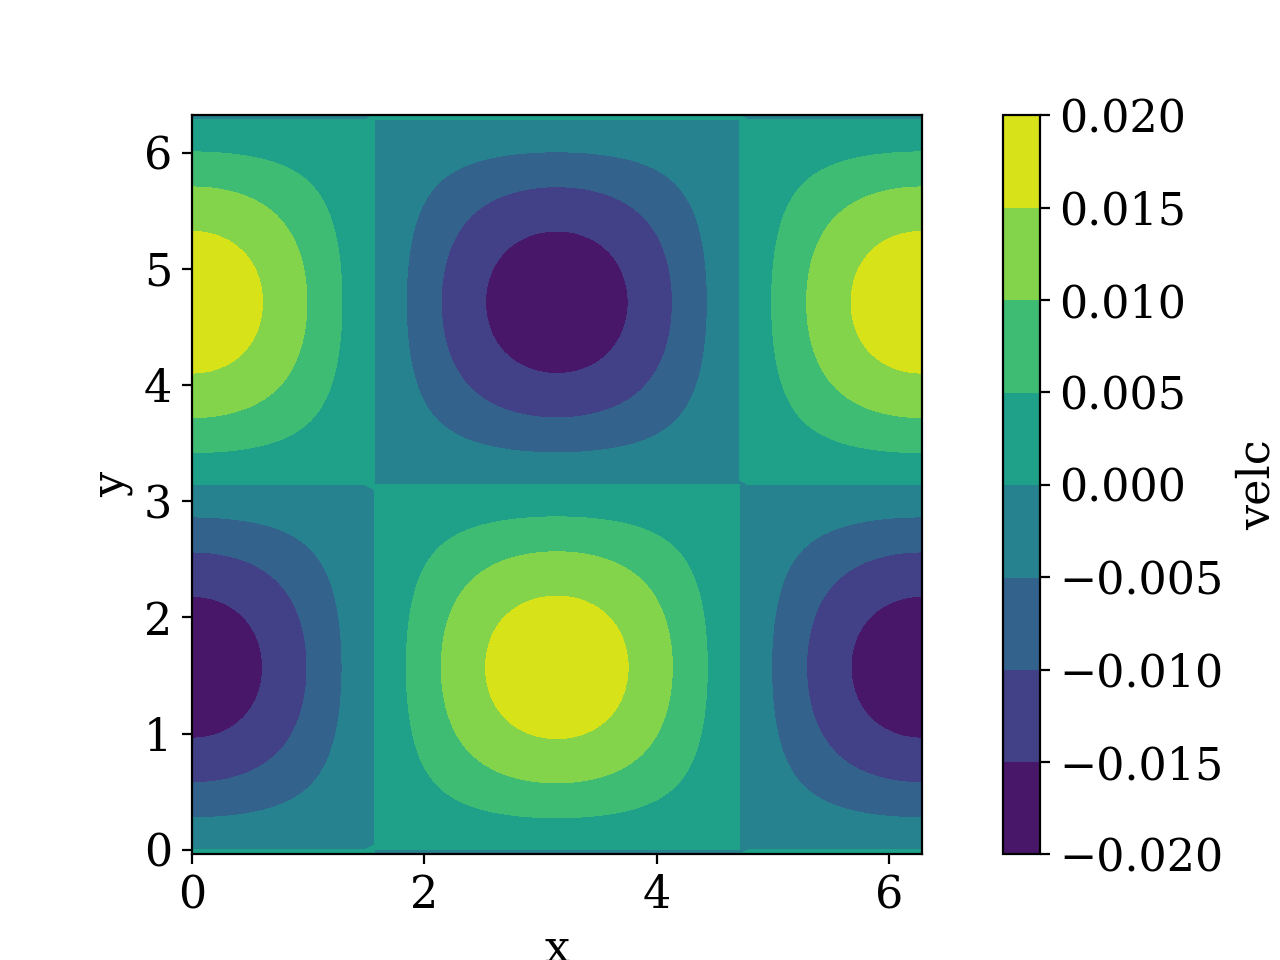

<IPython.core.display.Javascript object>


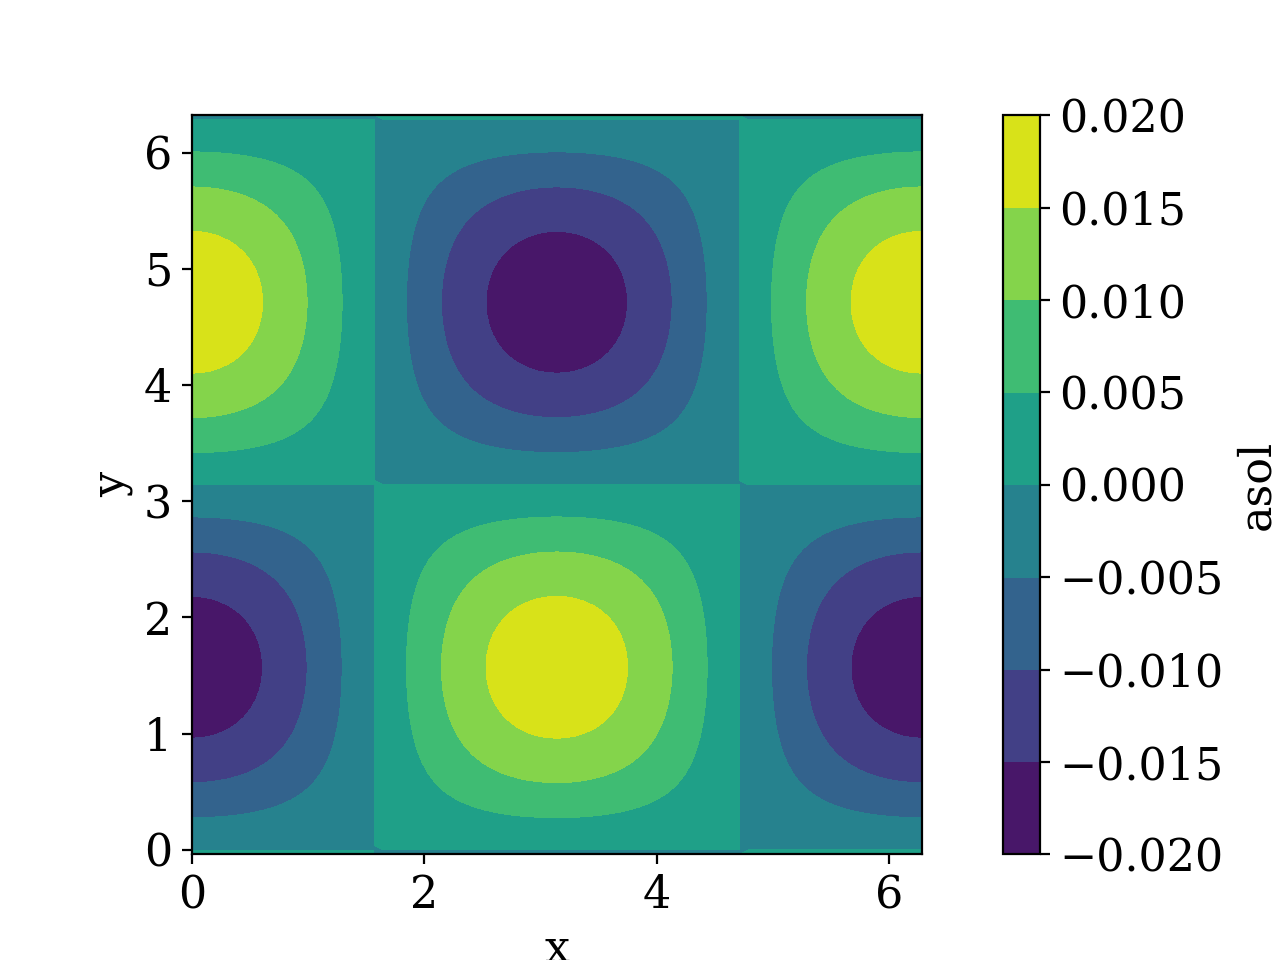

<IPython.core.display.Javascript object>


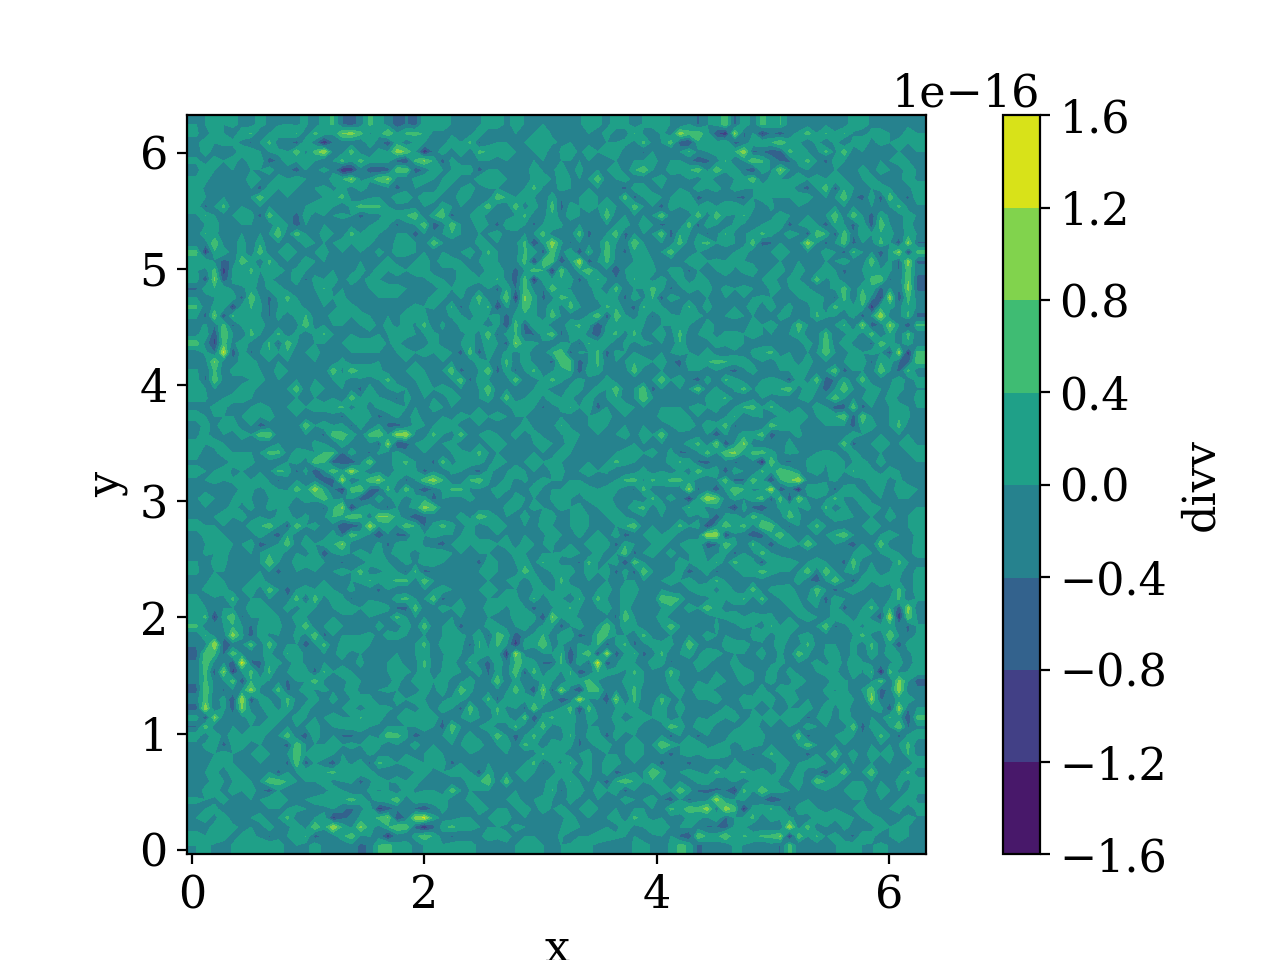

<IPython.core.display.Javascript object>


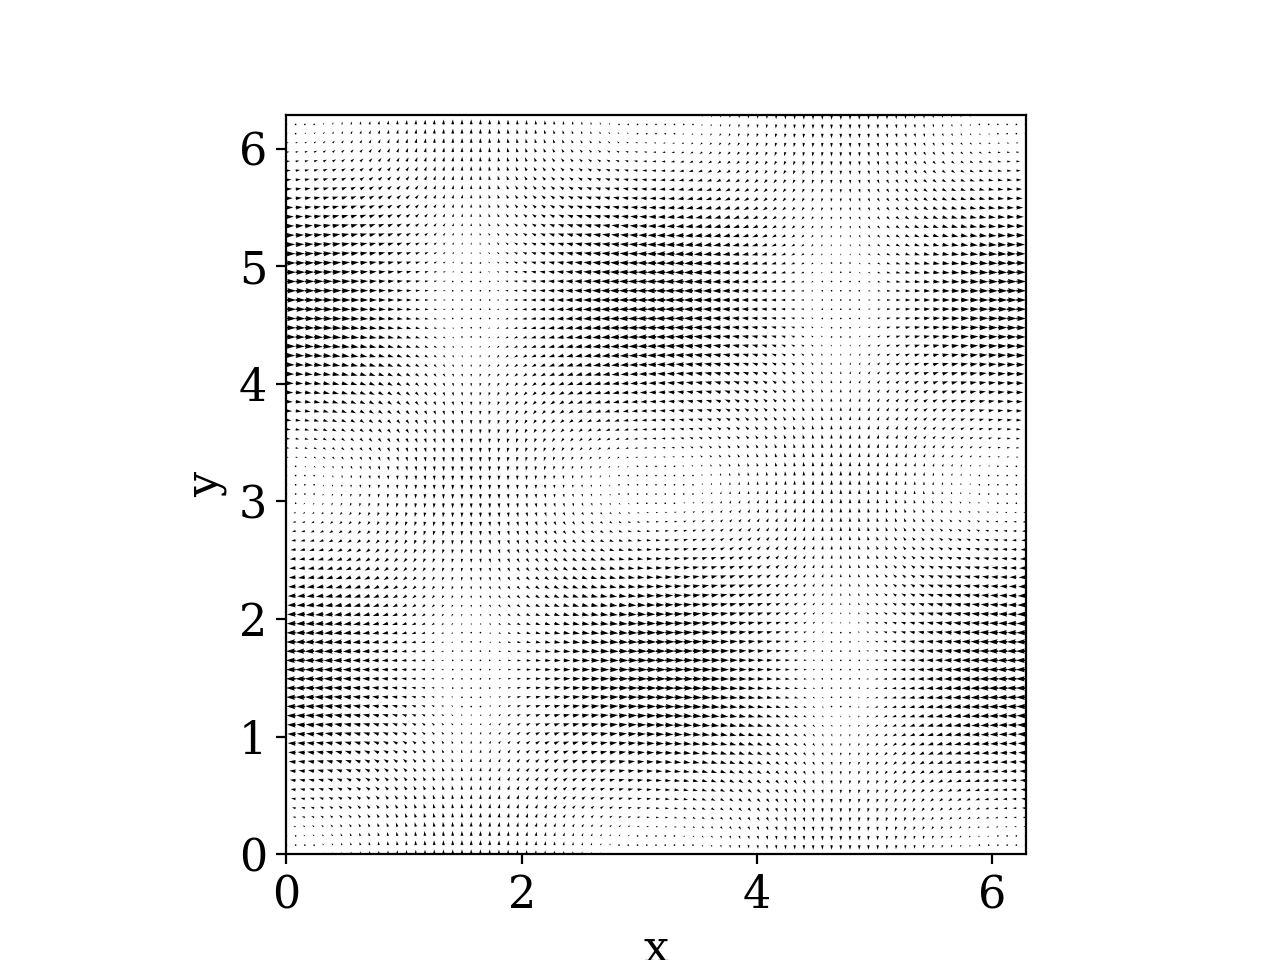

In [12]:
flowx.io.plot_contour(gridx, 'velc')
flowx.io.plot_contour(gridx, 'asol')
flowx.io.plot_contour(gridc, 'divv')
flowx.io.plot_vector(gridx, gridy, 'velc')

In [8]:
gridx.get_error('eror','velc','asol')
gridy.get_error('eror','velc','asol')

<IPython.core.display.Javascript object>


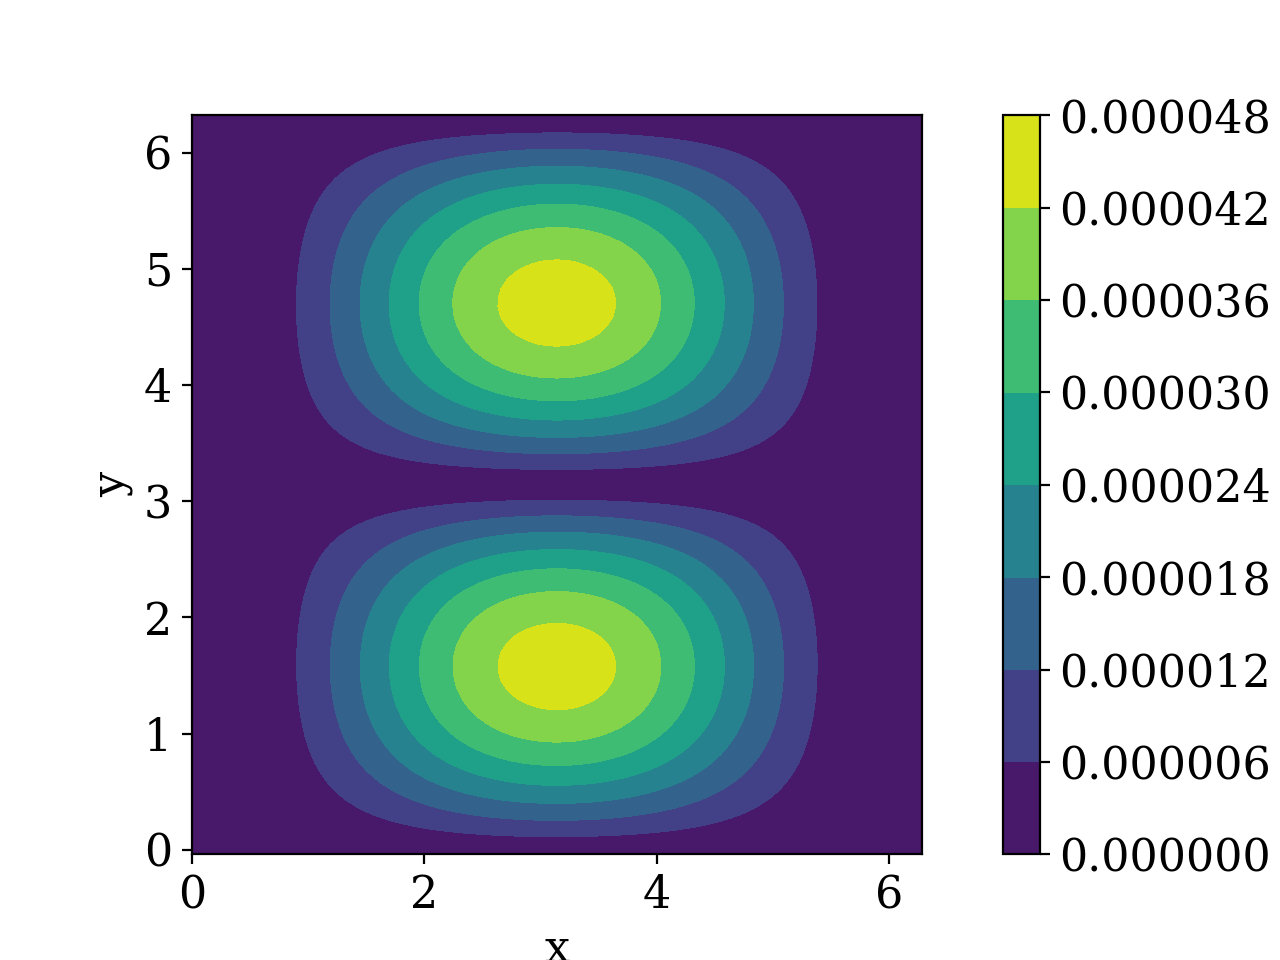

<IPython.core.display.Javascript object>


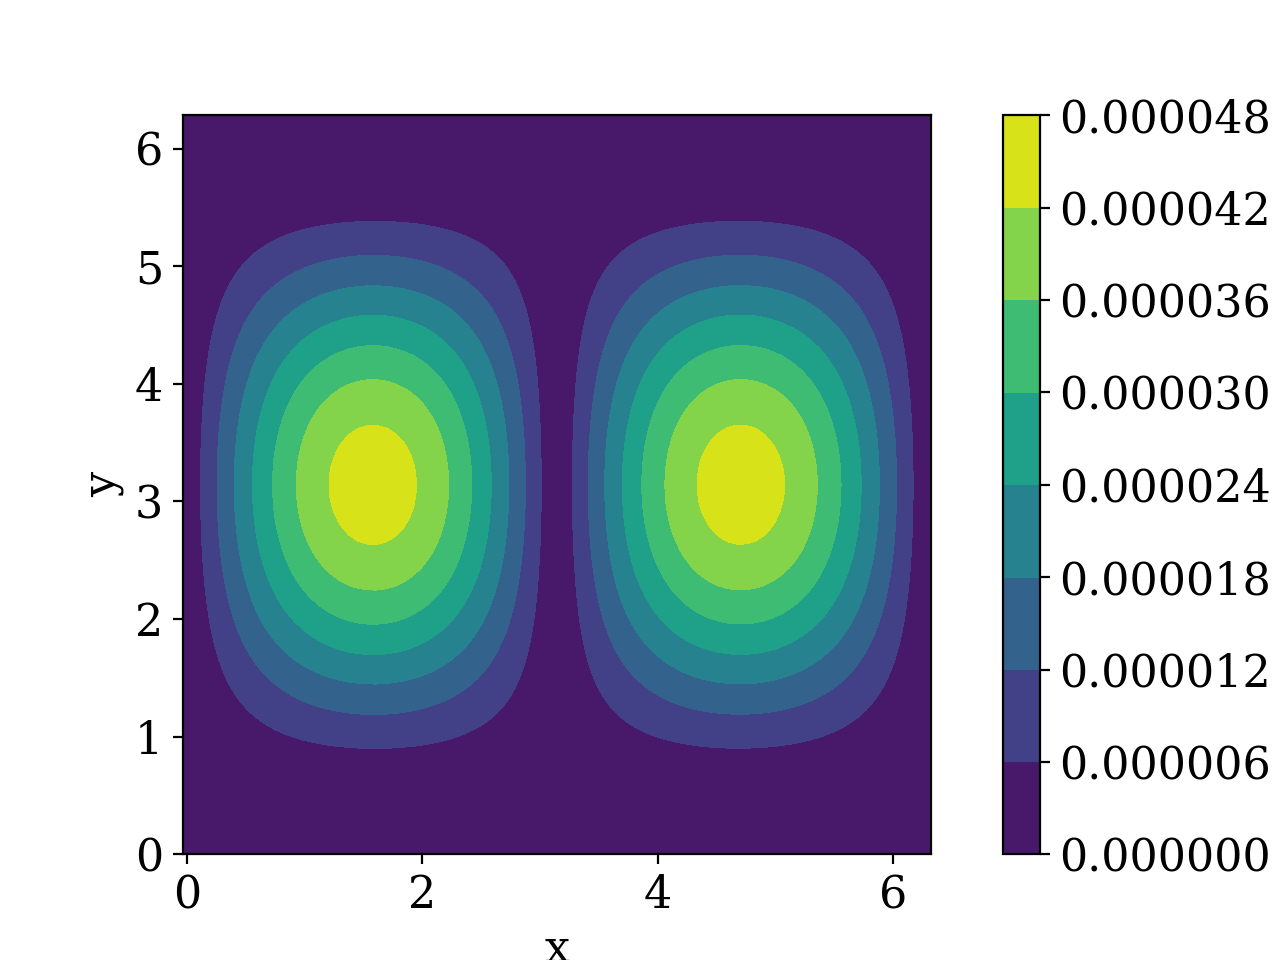

In [9]:
flowx.io.plot_contour(gridx, 'eror')
flowx.io.plot_contour(gridy, 'eror')